## Part II: CrossChatT

### Load required packages

In [1]:
import crosschat as cc
import scanpy as sc


/Users/xinyiwang/.pyenv/versions/3.8.9/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


### Load data and preprocess

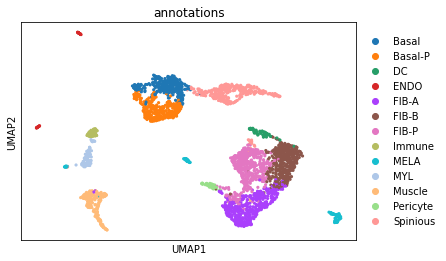

In [2]:
adata = sc.read_h5ad('../src/crosschat/data/mouse_embryo_skin3000.h5ad')
ccT_obj = cc.CrossChatT(adata,species="mouse")
ccT_obj.prepare_adata(normalize=False, scale=True, input='allgenes')
ccT_obj.Draw_annotations_umap()

### Detect trees

In [3]:
ccT_obj.Detect_trees(type='l',tree_size=4, tree_scales=3)
ccT_obj.Detect_trees(type='r', tree_size=3, tree_scales=2)
ccT_obj.Detect_trees(type='lr_union',inclusive_threshold=0.98,disjoint_threshold=0.98,tree_size=4,tree_scales=3)

Parameters:
- `type`: the type of trees to be detected (ligand trees, receptor trees, or ligand-receptor union trees)
- `tree_size`: the number of nodes in the tree must be at least of tree_size
- `tree_scales`: the number of scales in the tree must be at least of tree_scales
- `inclusive_threshold`: a threshold of inclusion of cell groups to allow partial inclusion in trees
- `disjoint_threshold`: a threshold of disjointness of cell groups to allow small amount of overlap in trees

### Draw detected trees

0


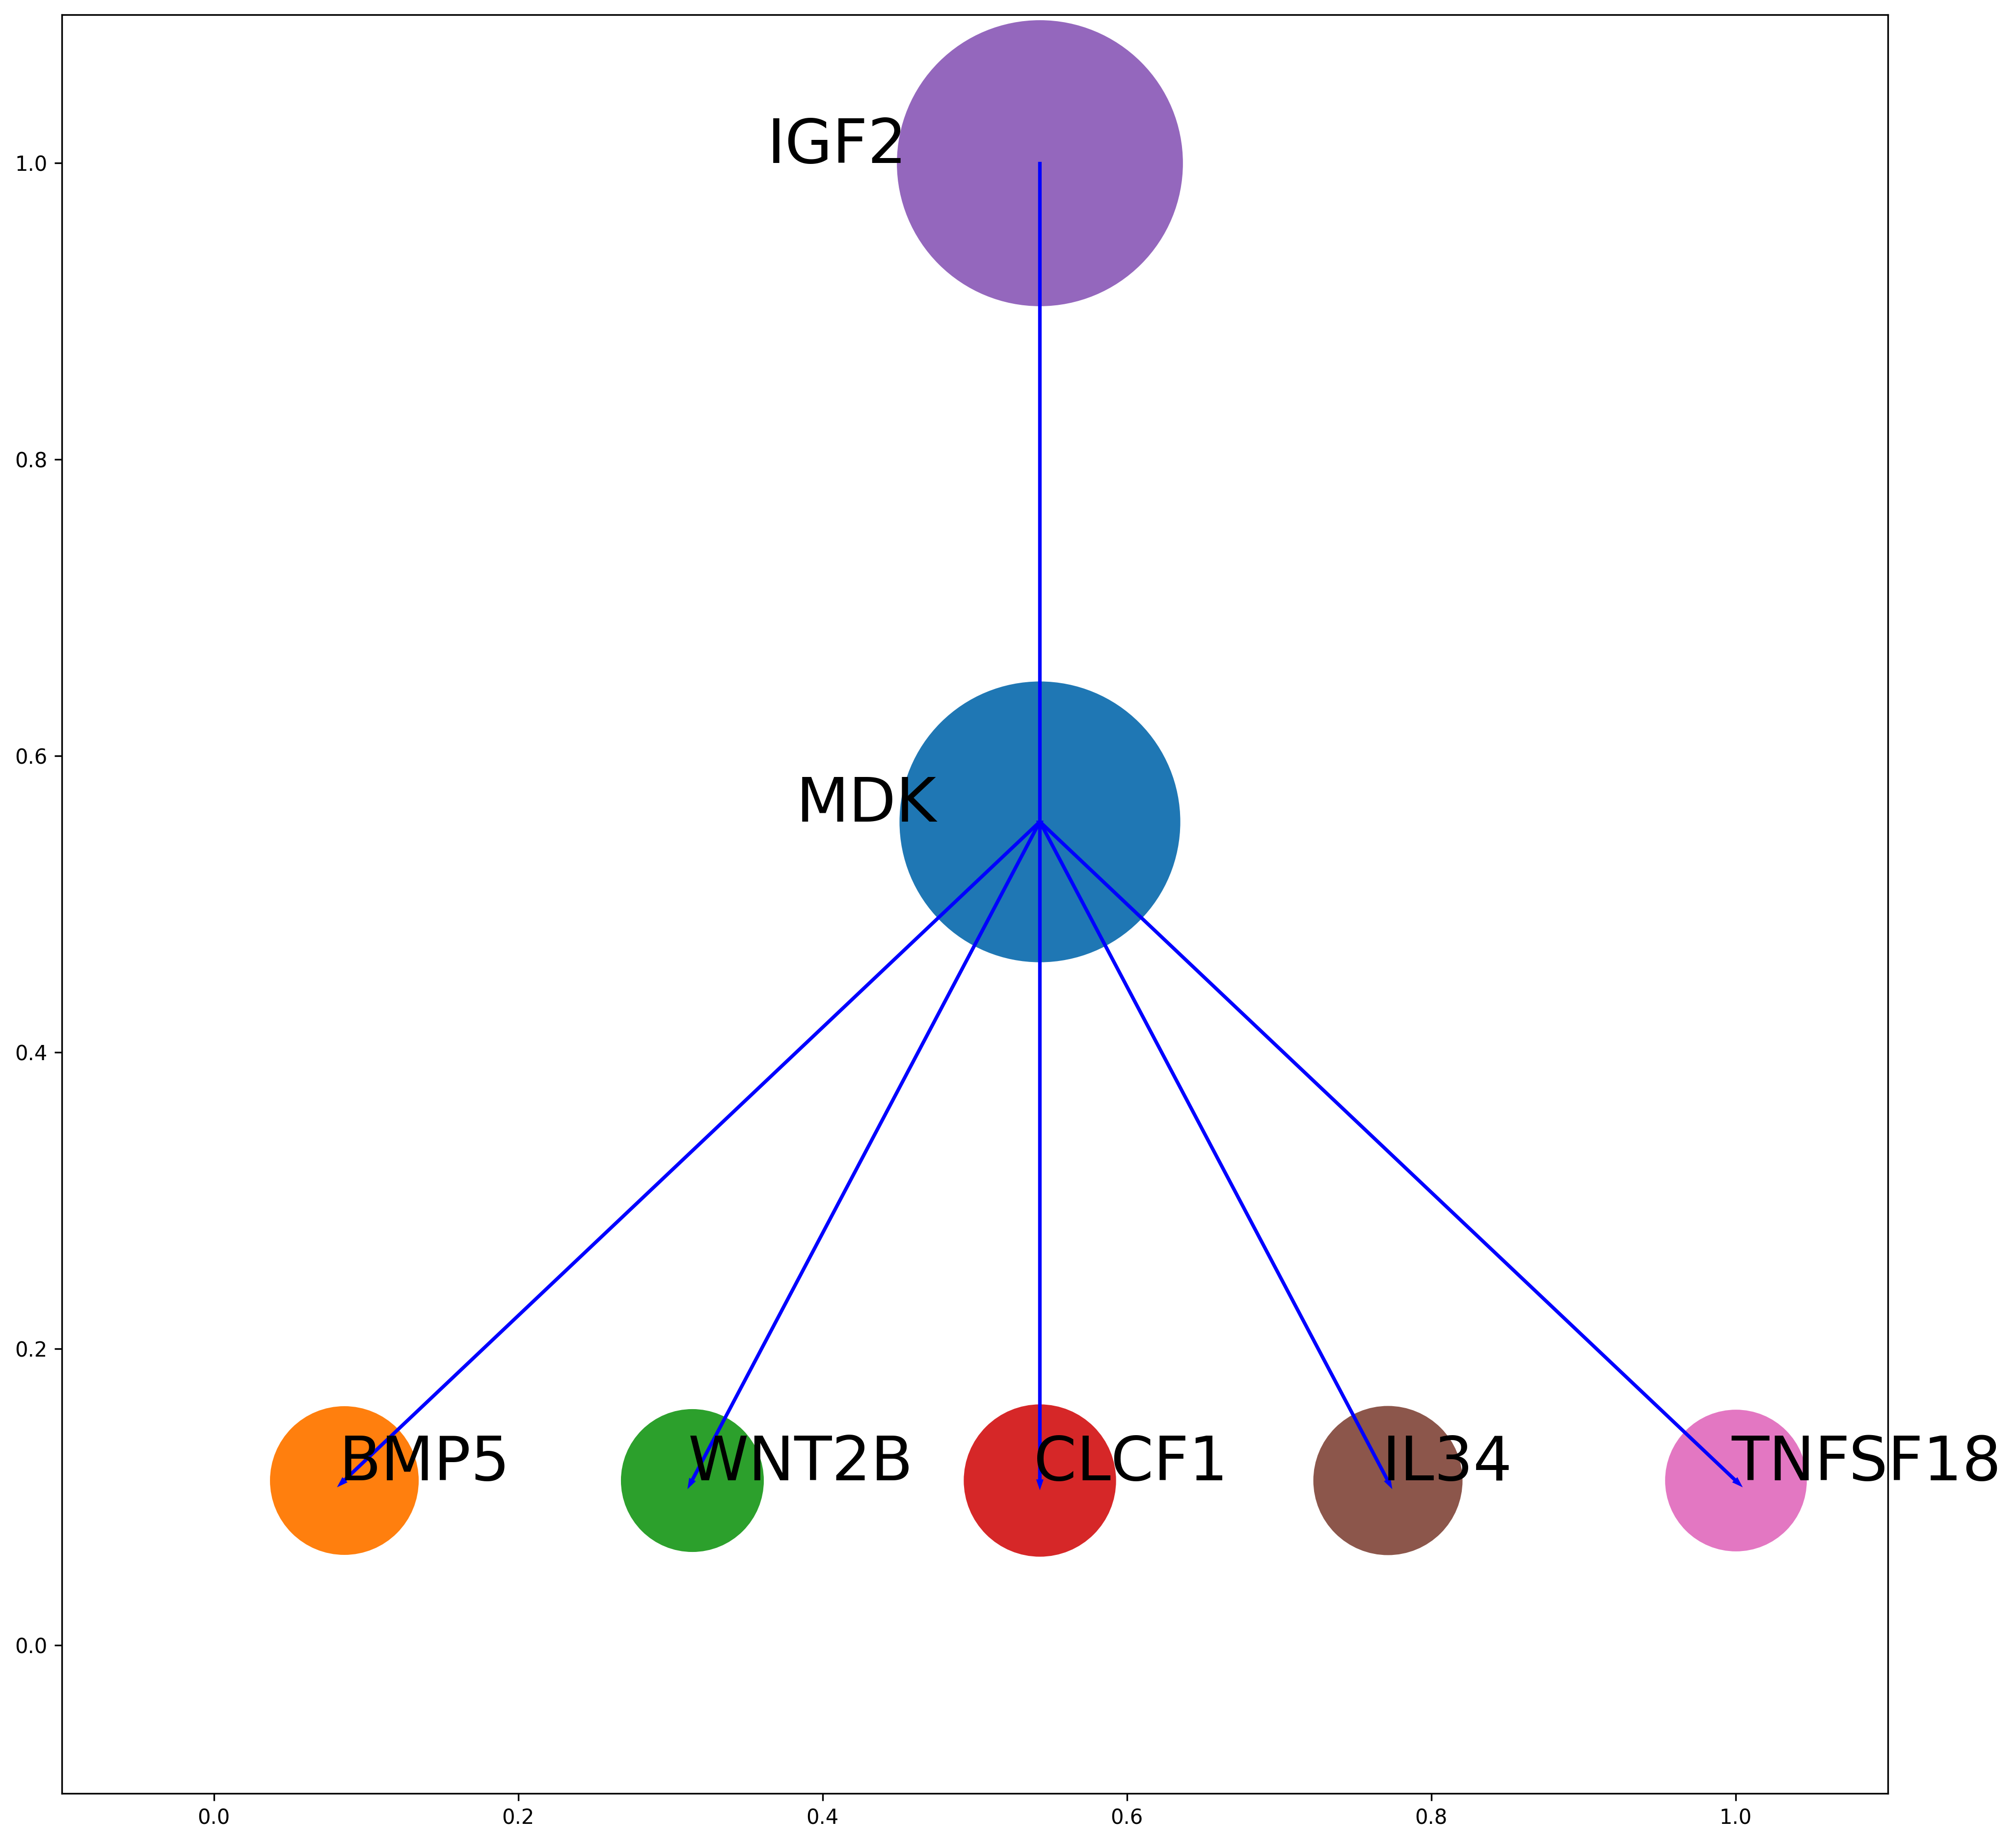

1


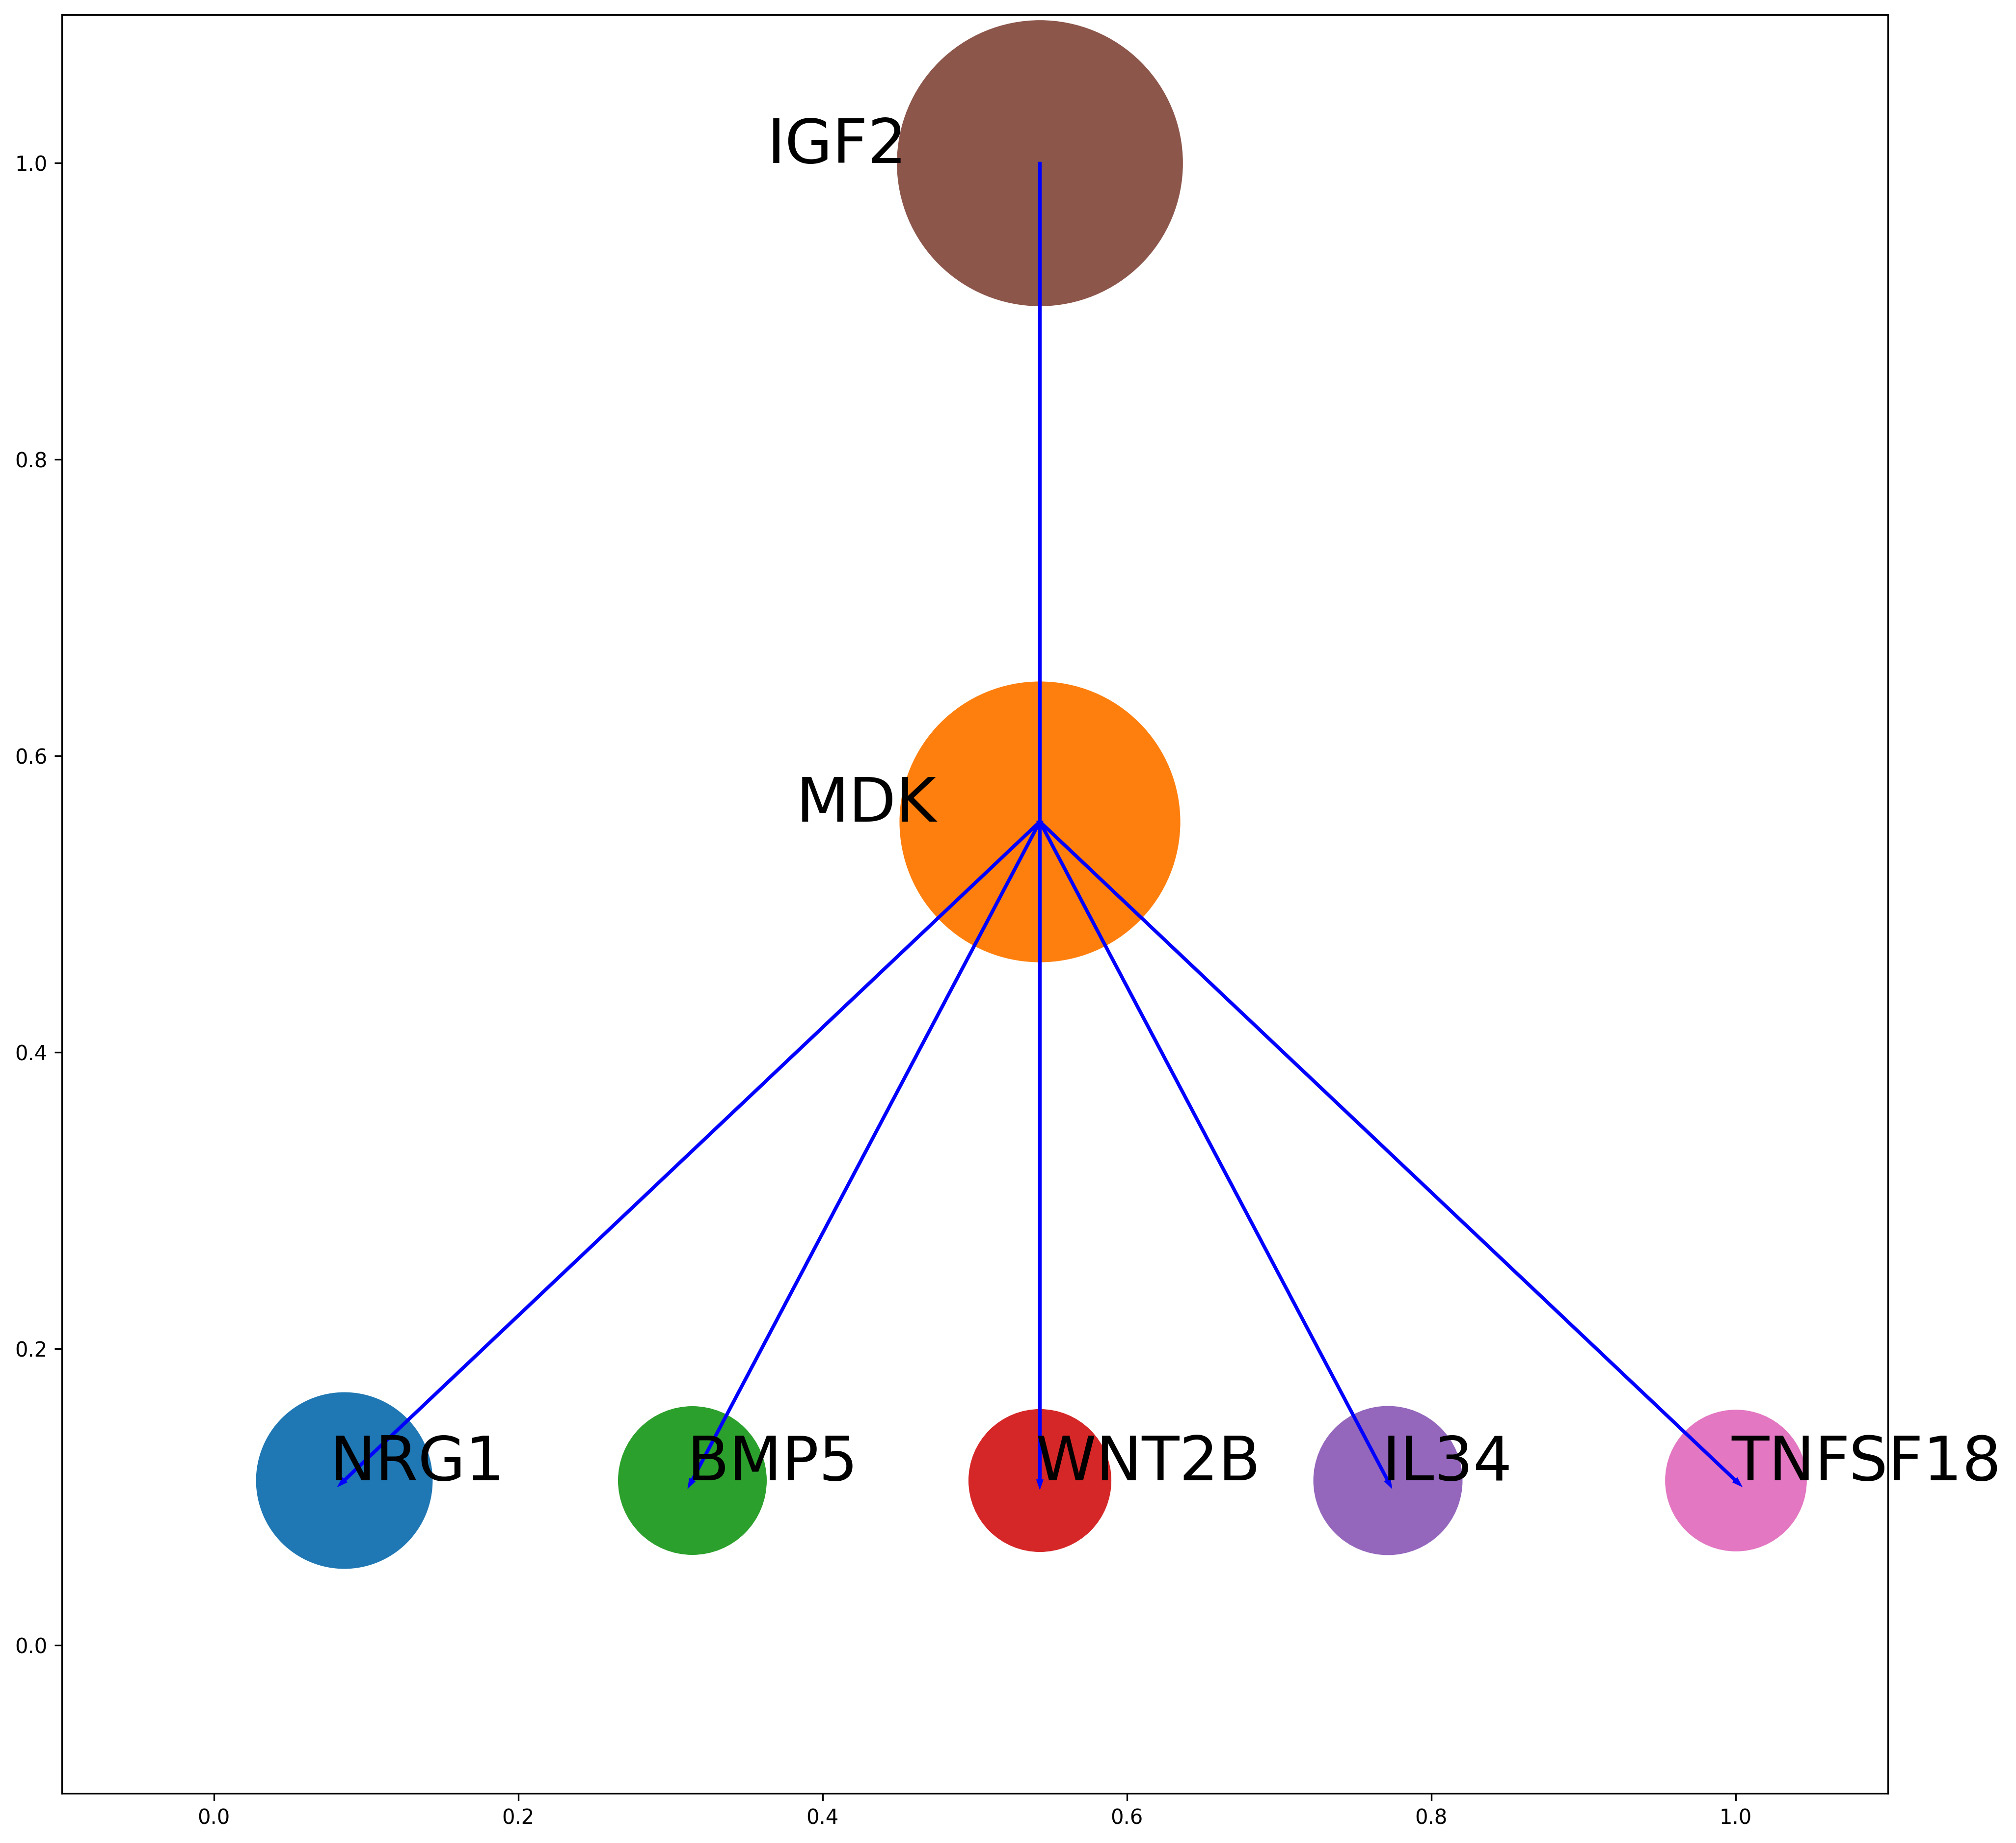

2


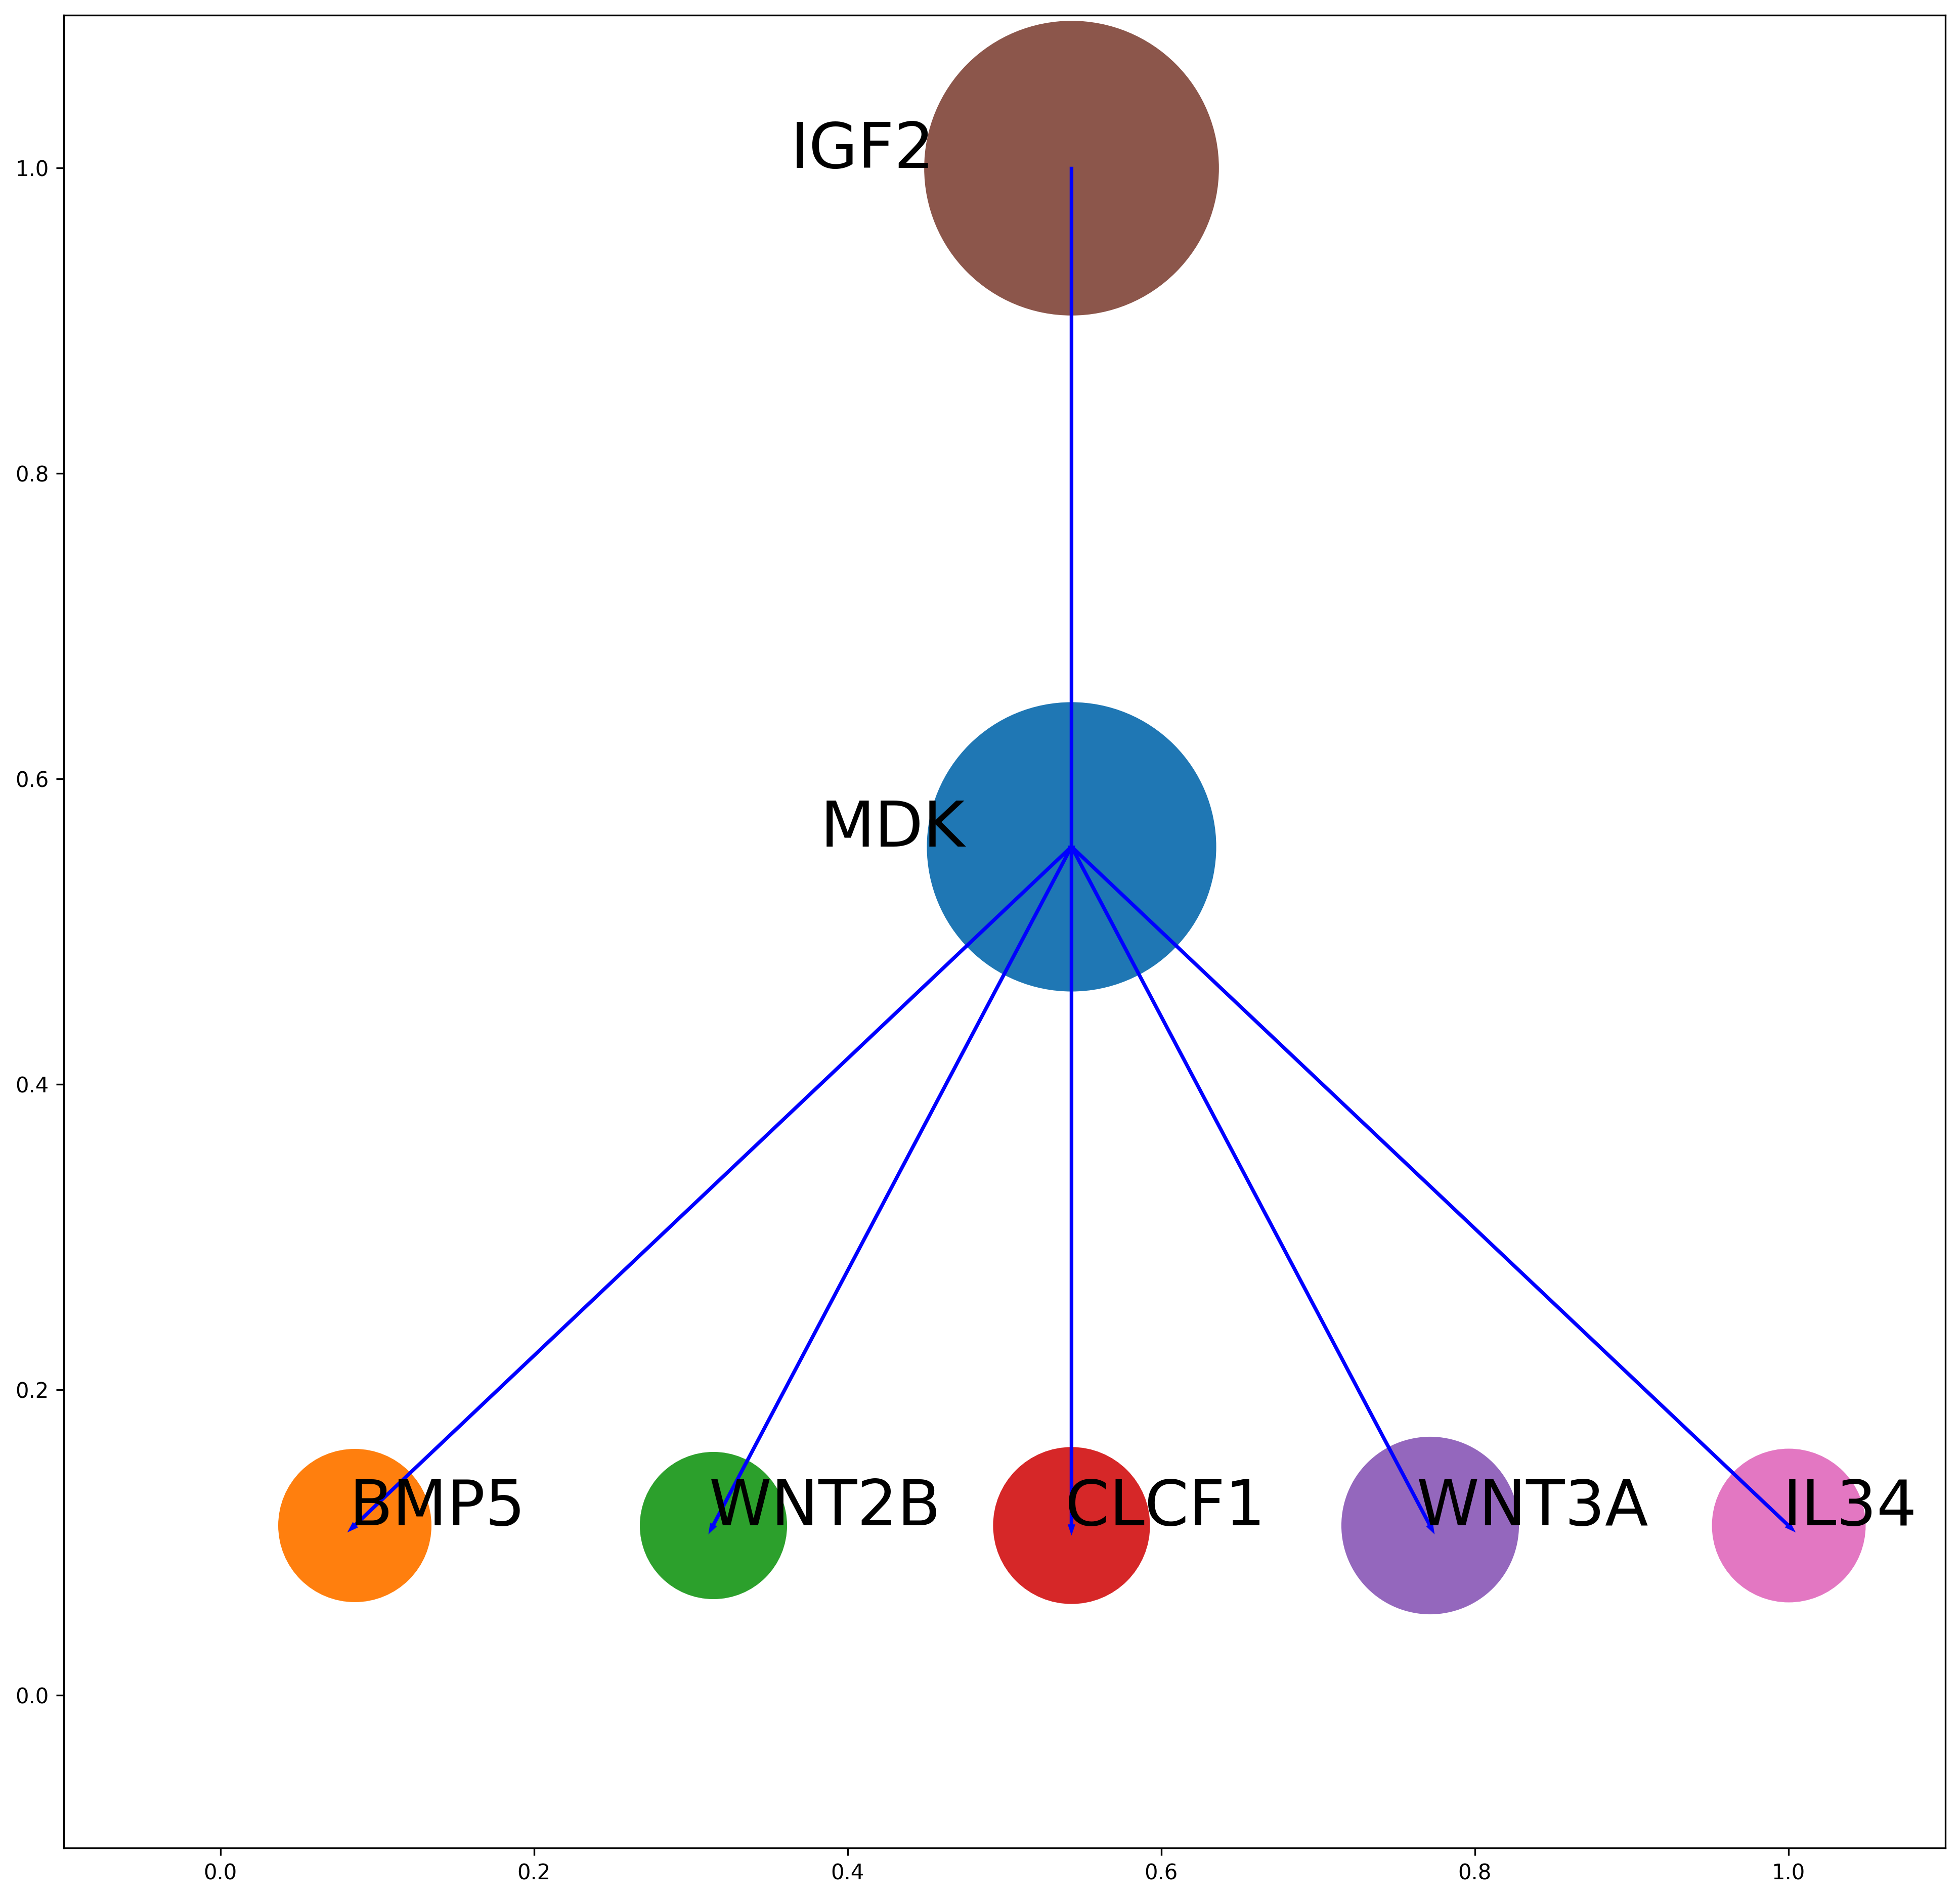

In [4]:
ccT_obj.Draw_MMT(type="l",tree_inds=[0,1,2])

### Draw union of trees

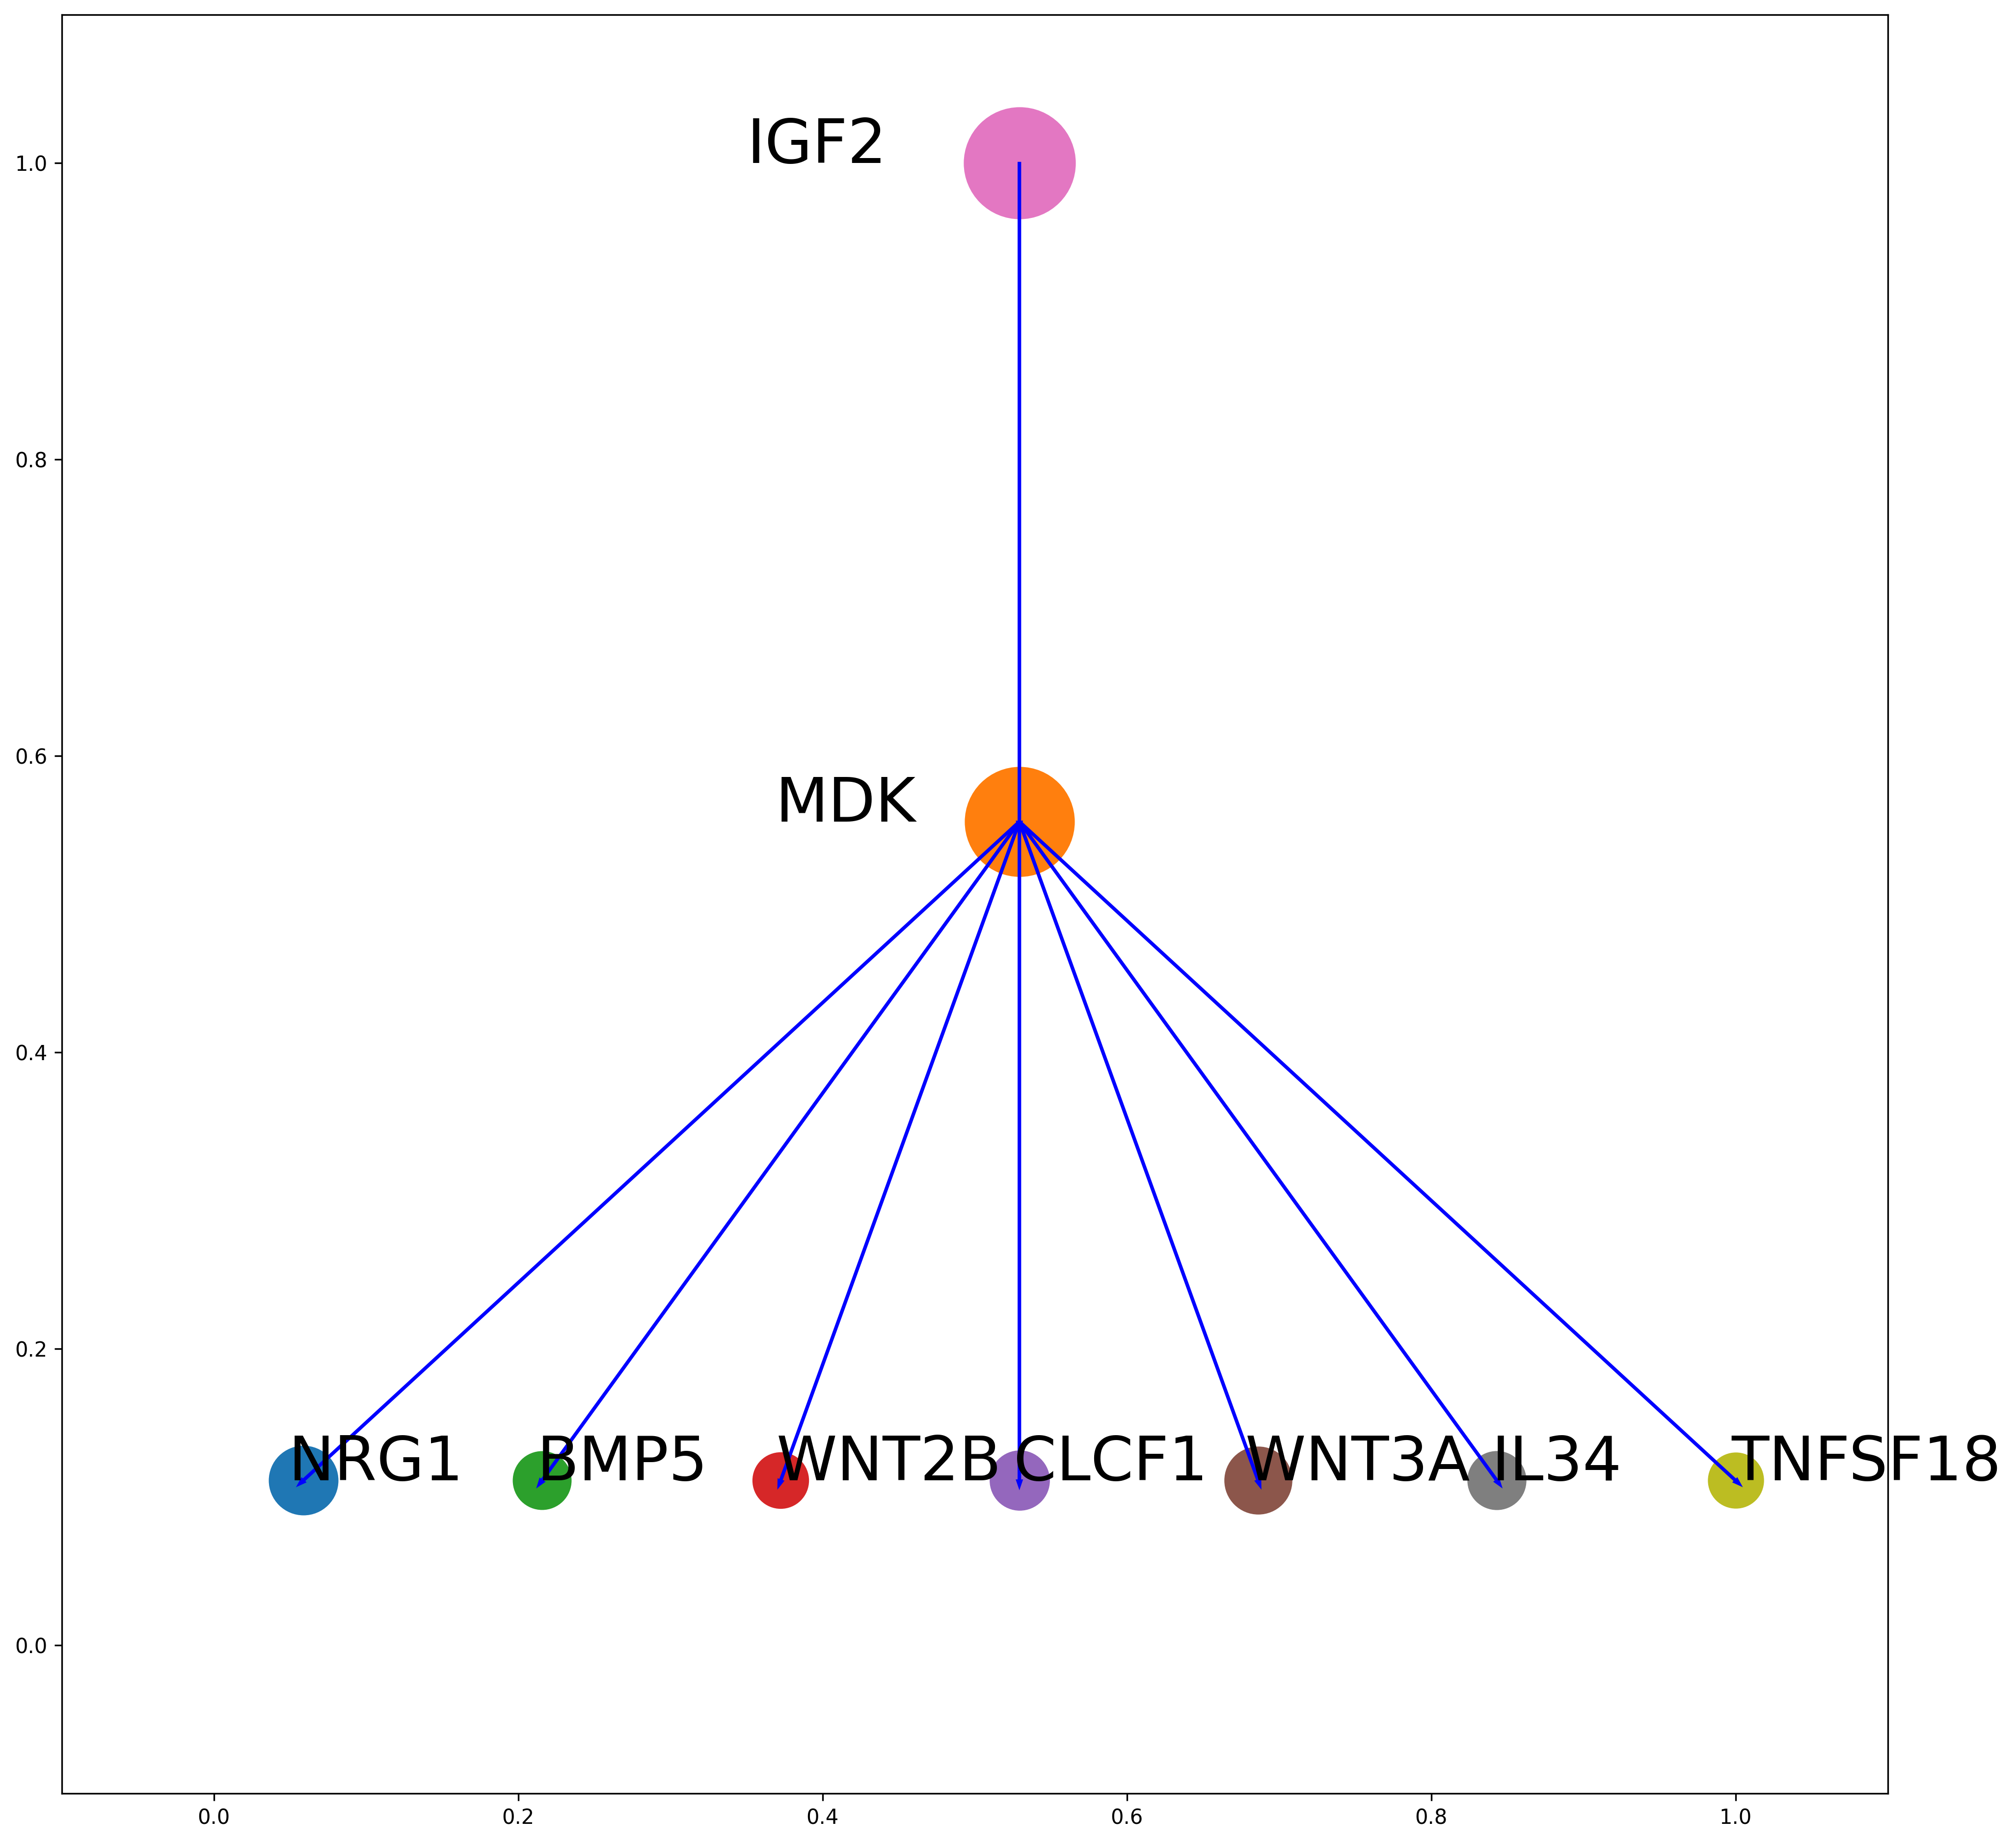

In [5]:
ccT_obj.Draw_big_tree(type='l',tree_inds=[0,1,2])

### Draw CCC between detected trees of ligands or receptors

0


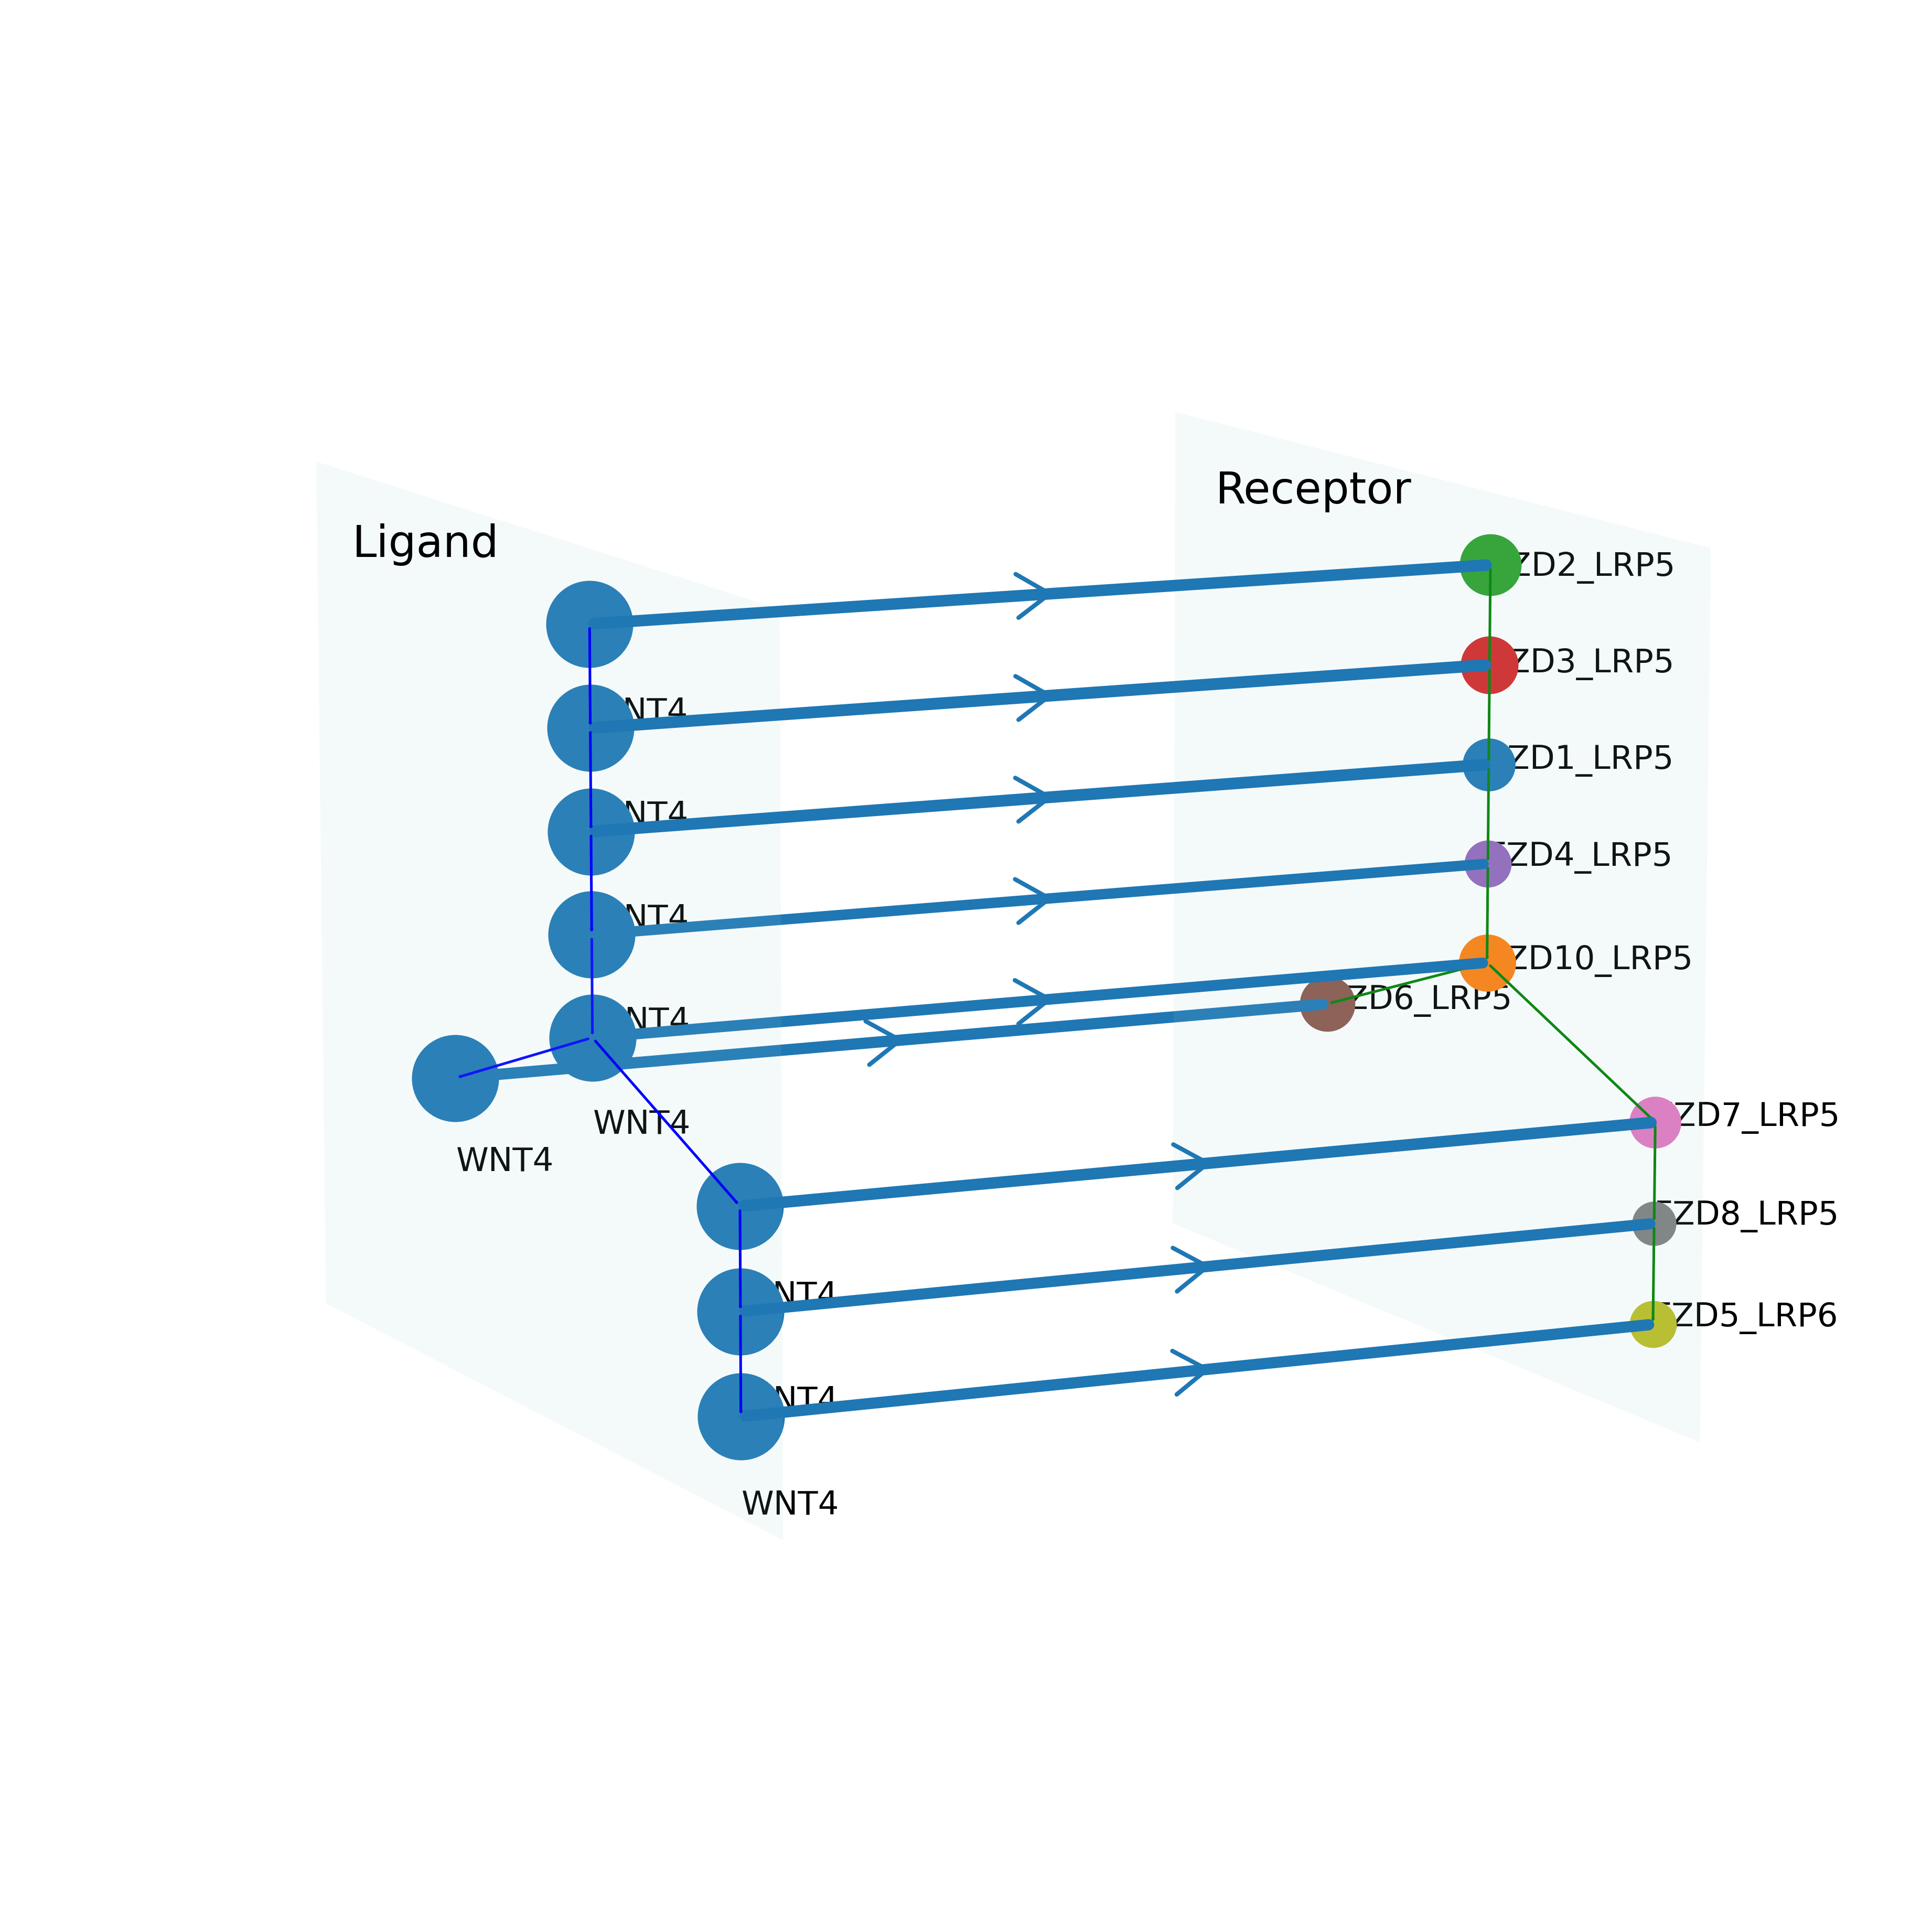

1


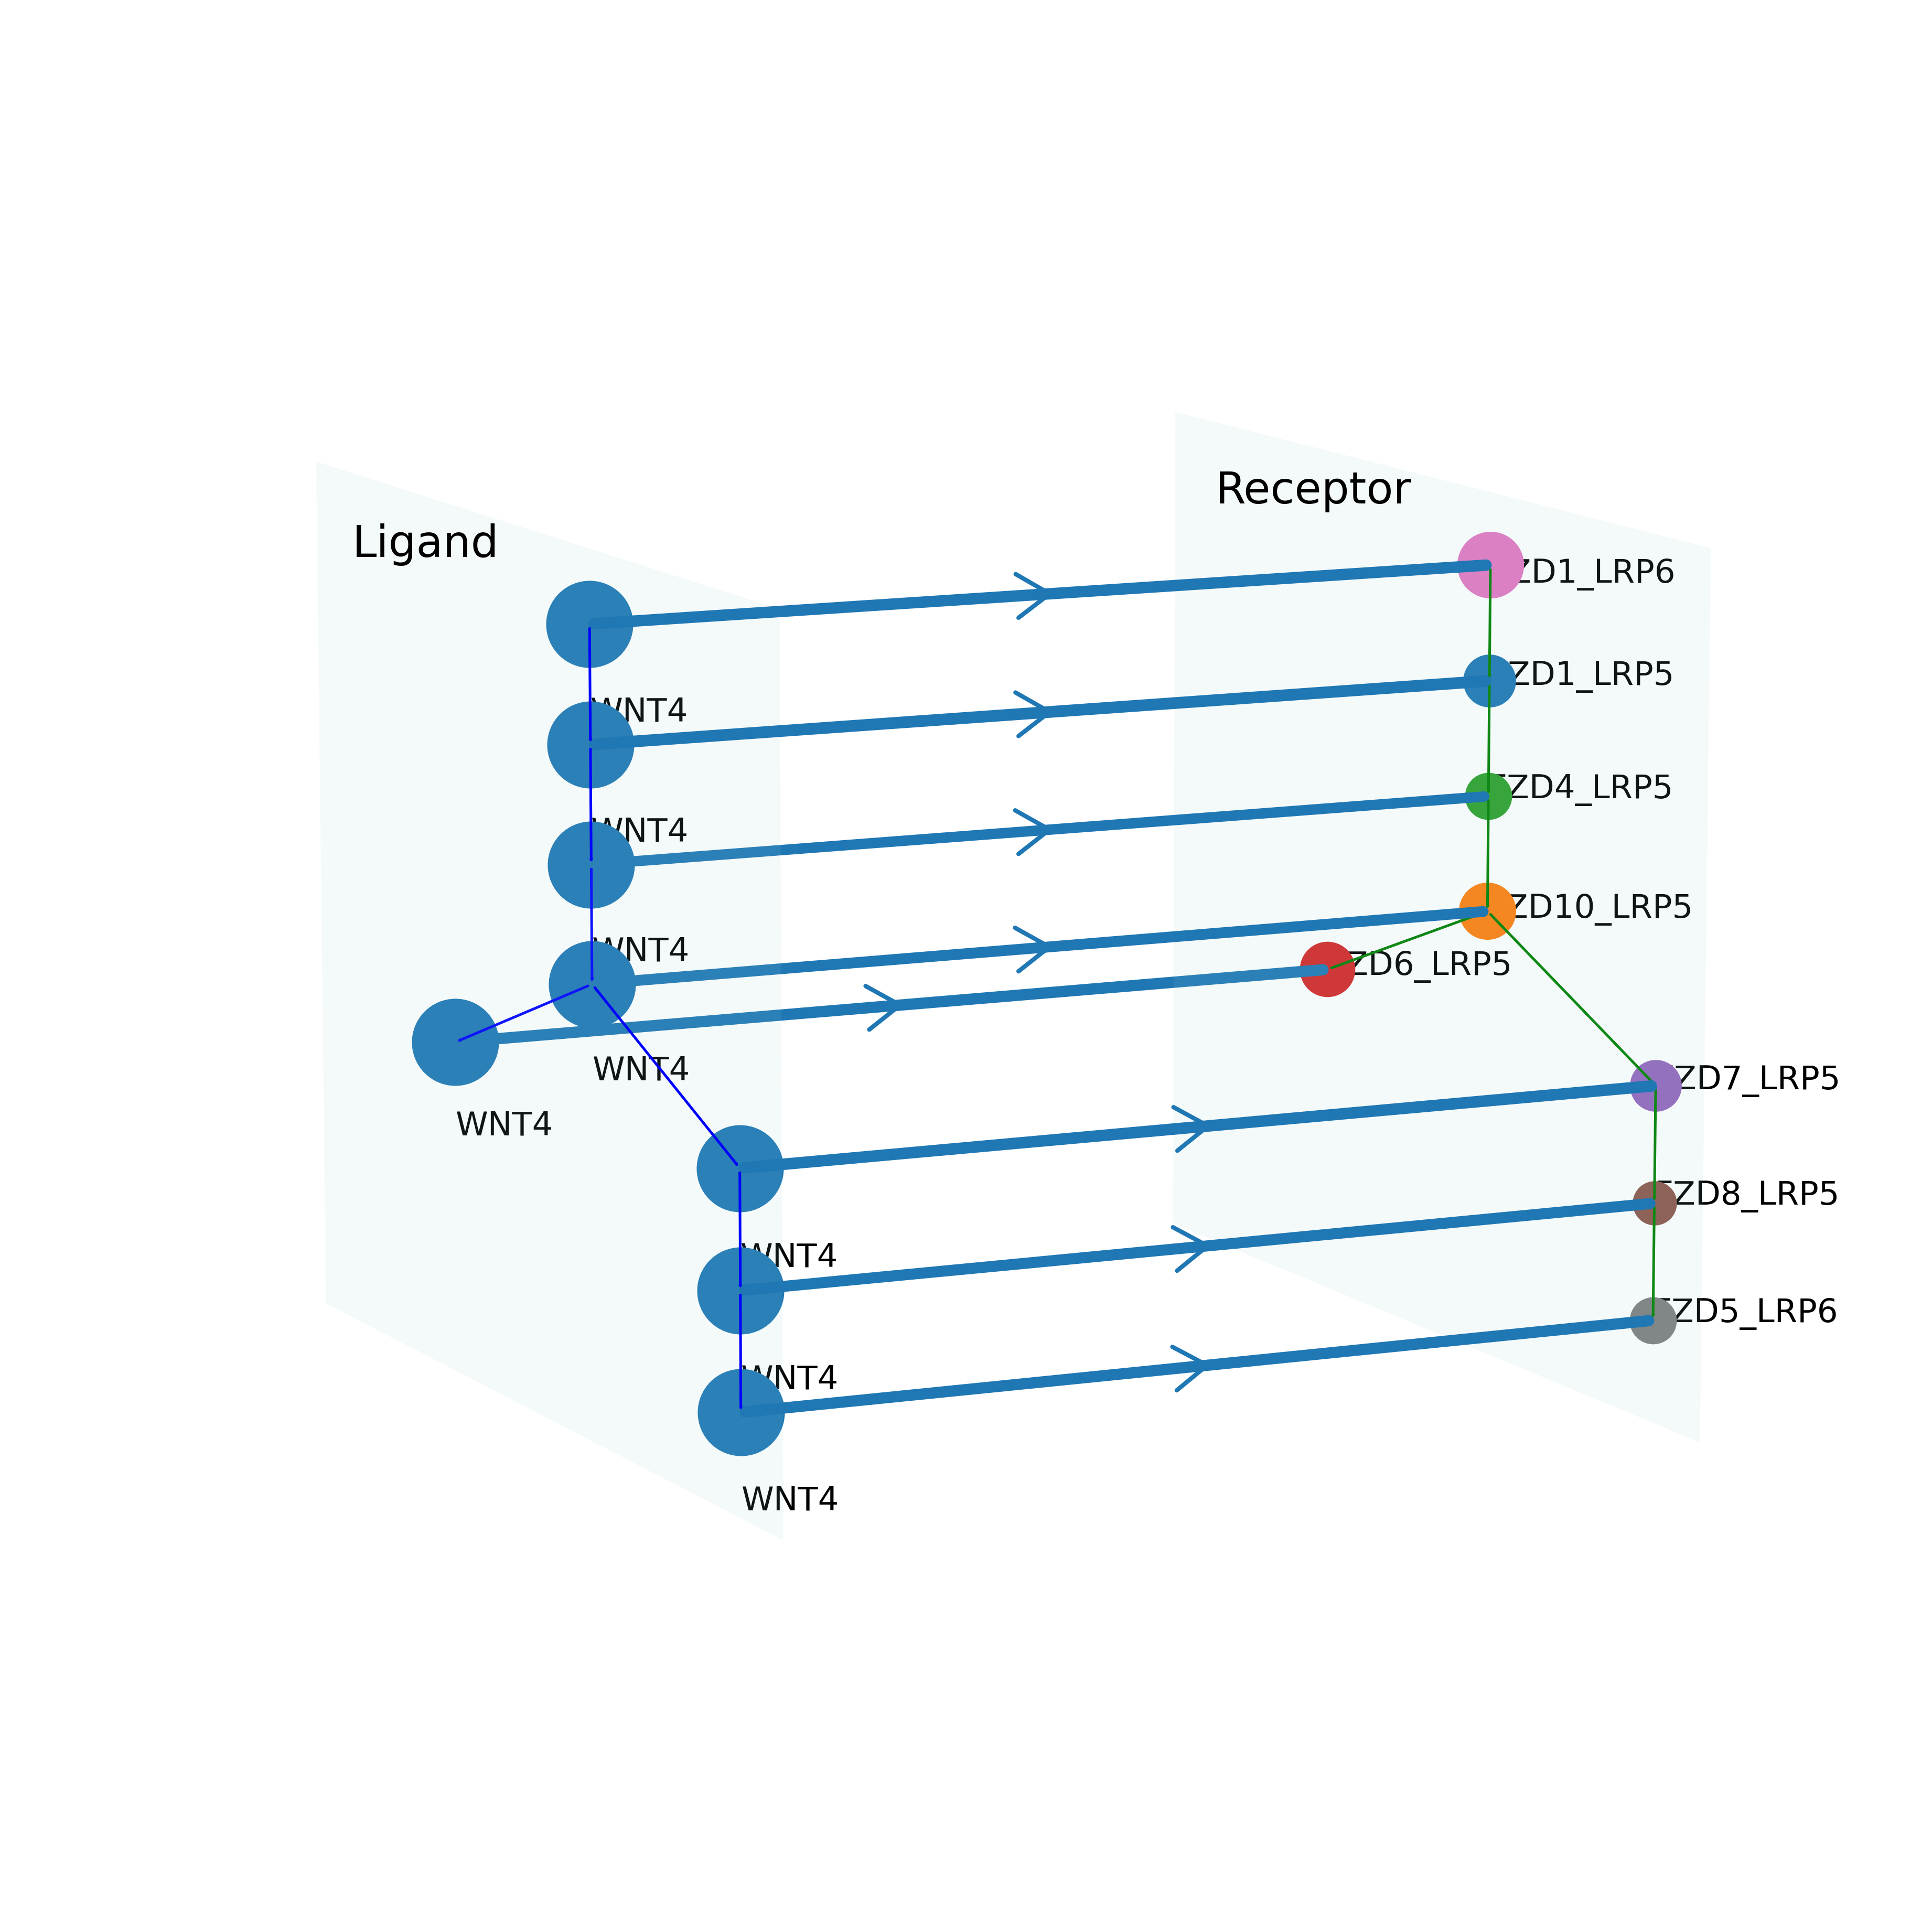

In [6]:
ccT_obj.Draw_MMT_lr_union(tree_inds=[0,1])


### Draw CCC between interacting ligand tree and receptor tree

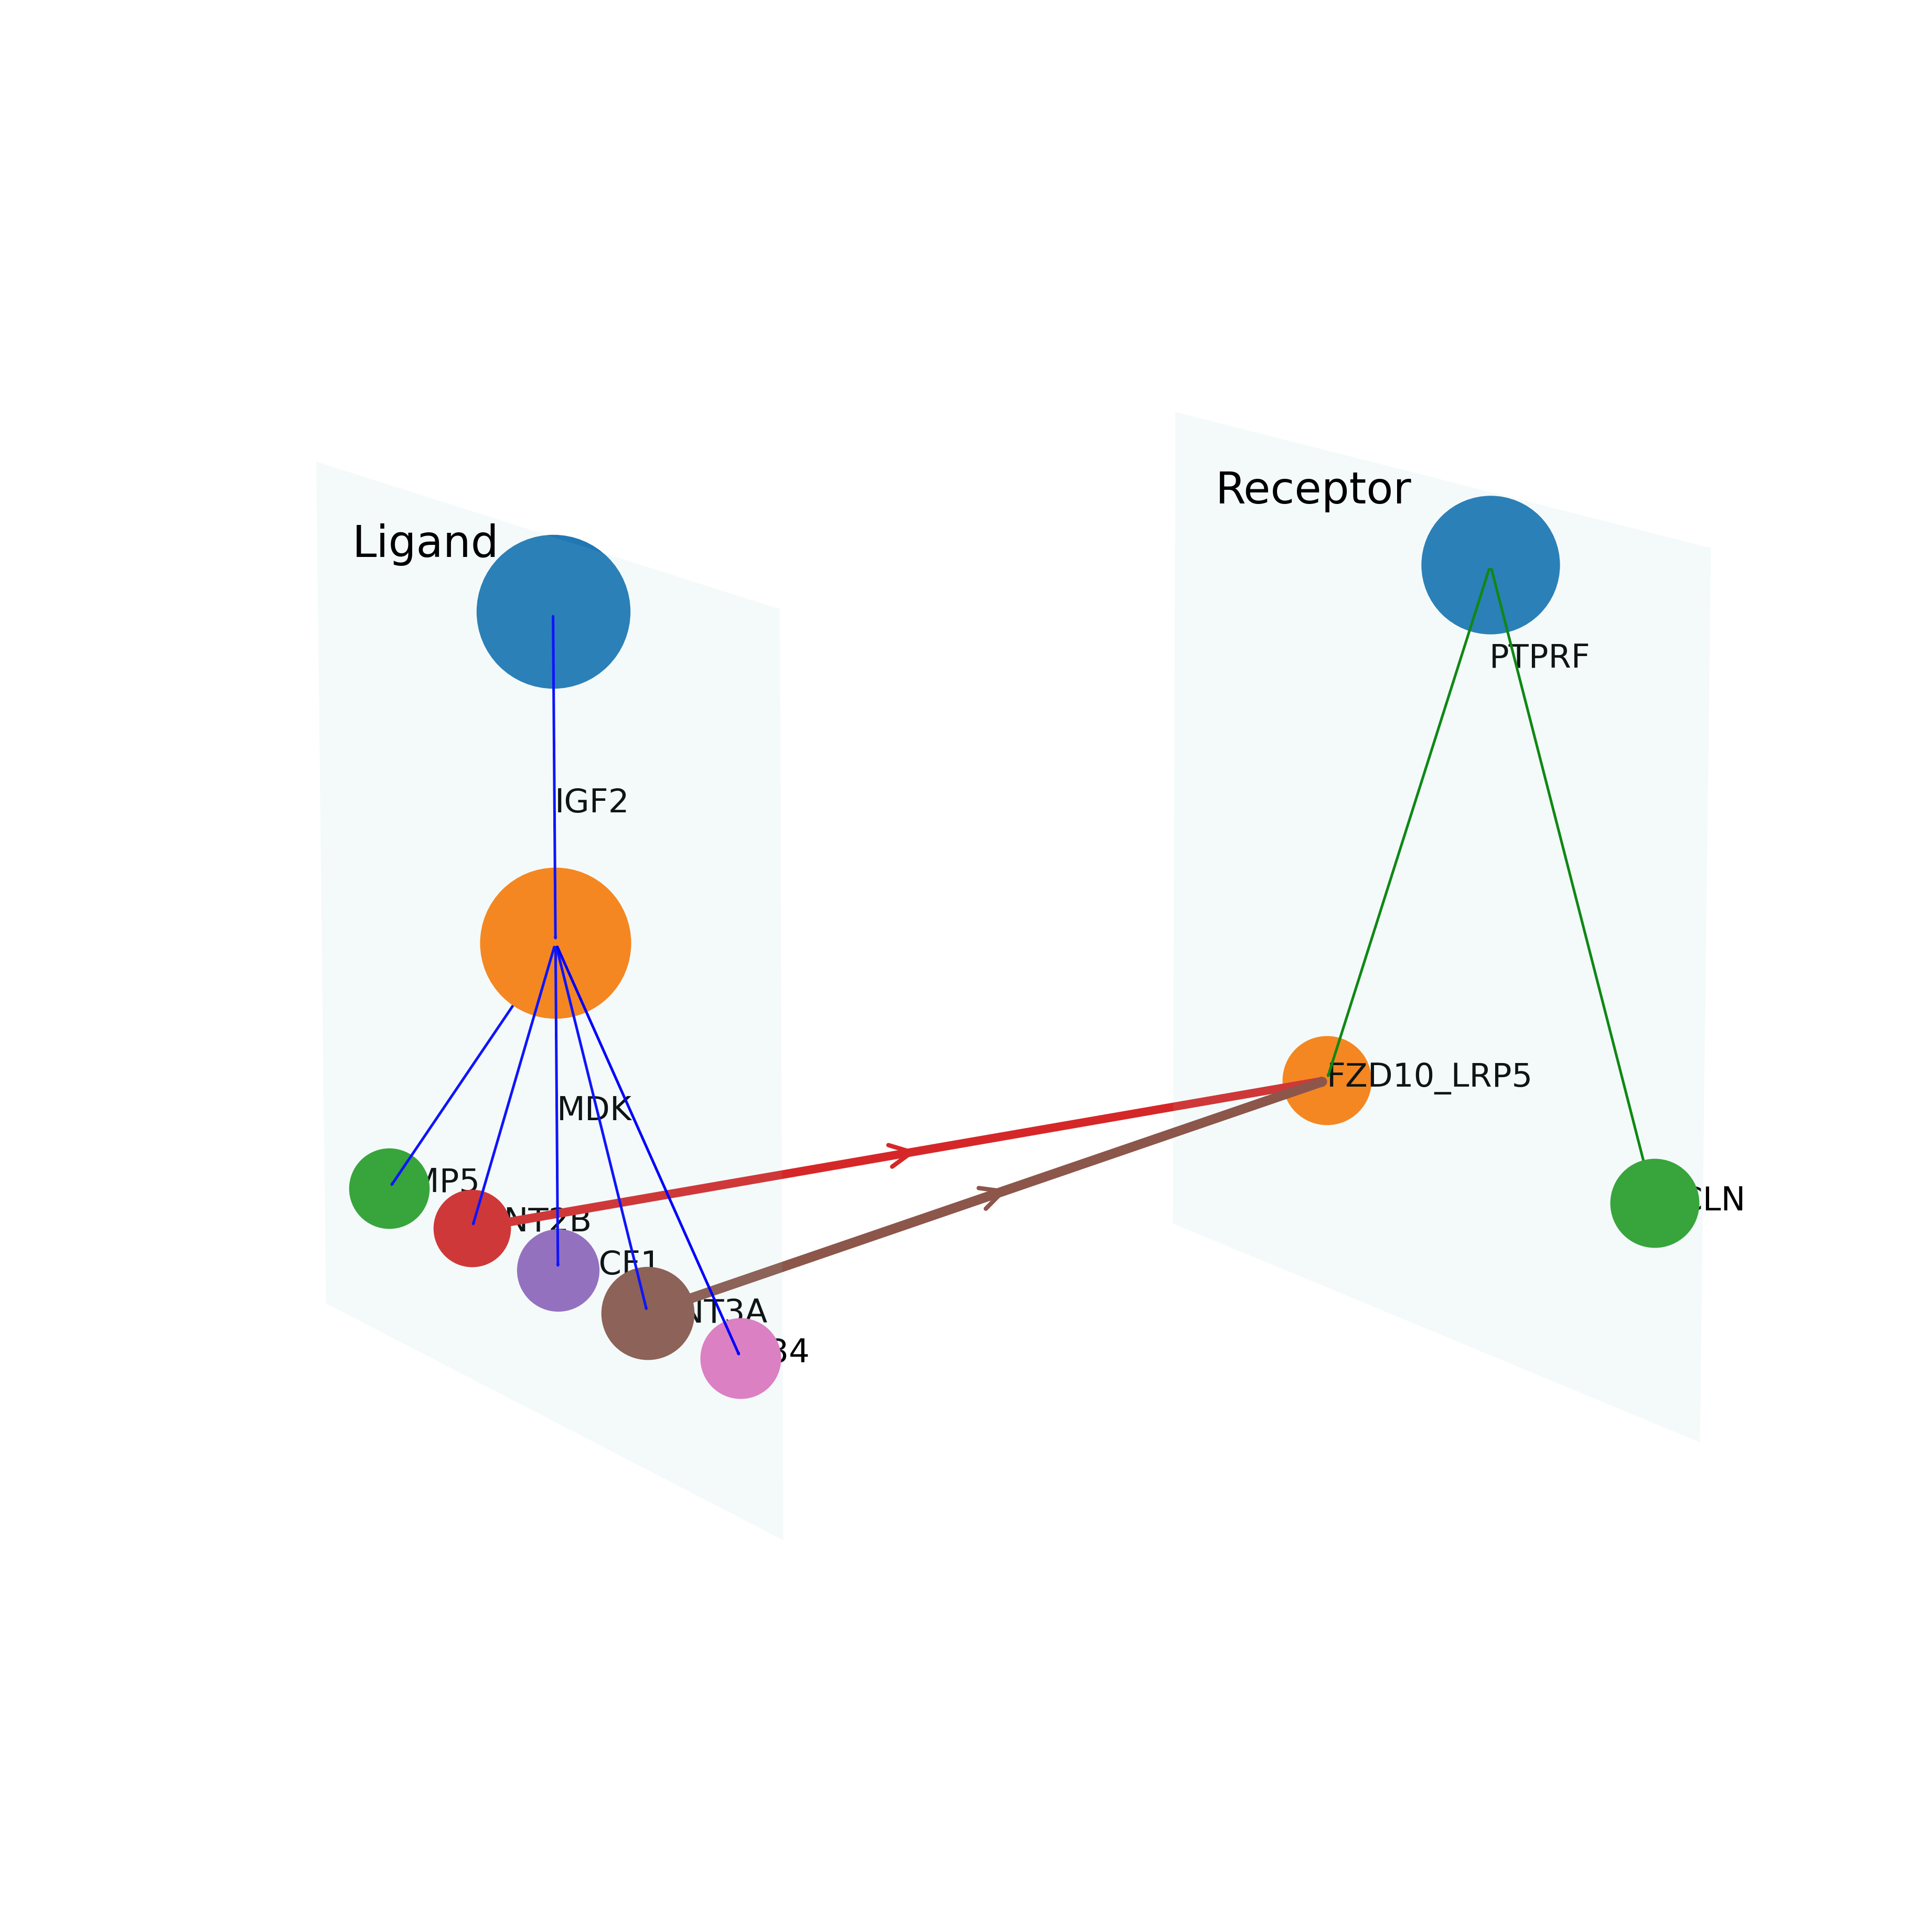

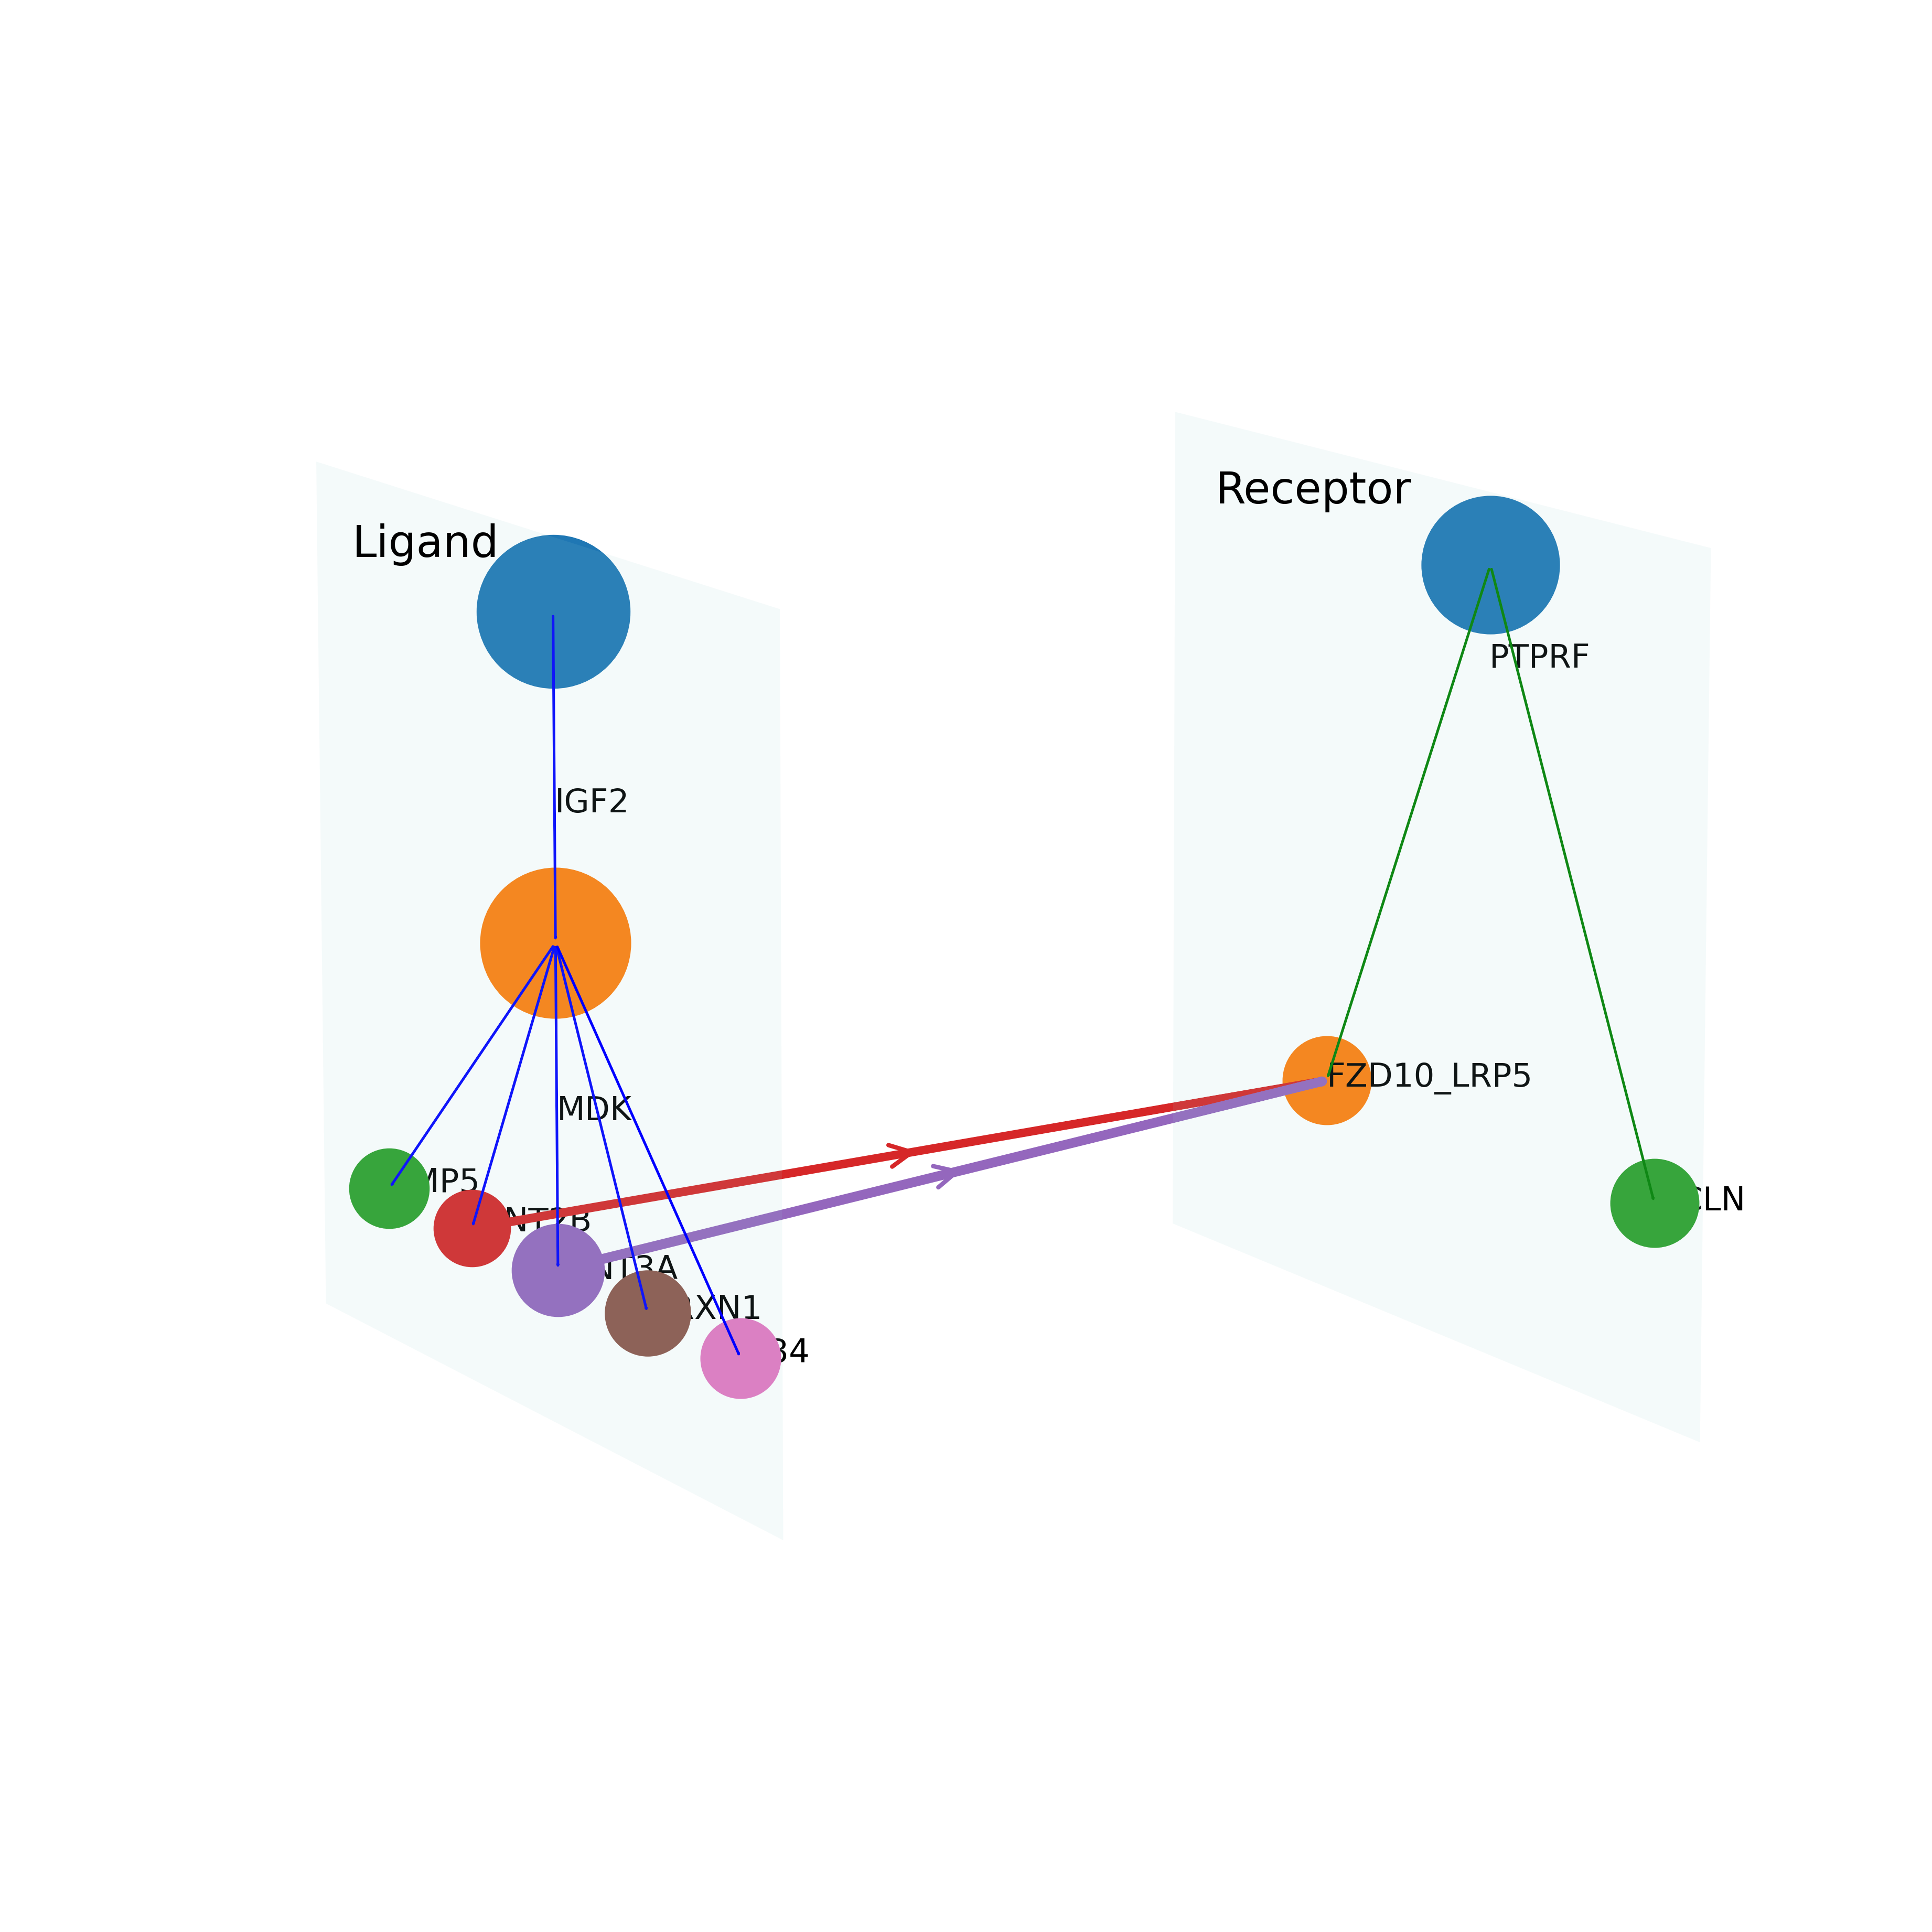

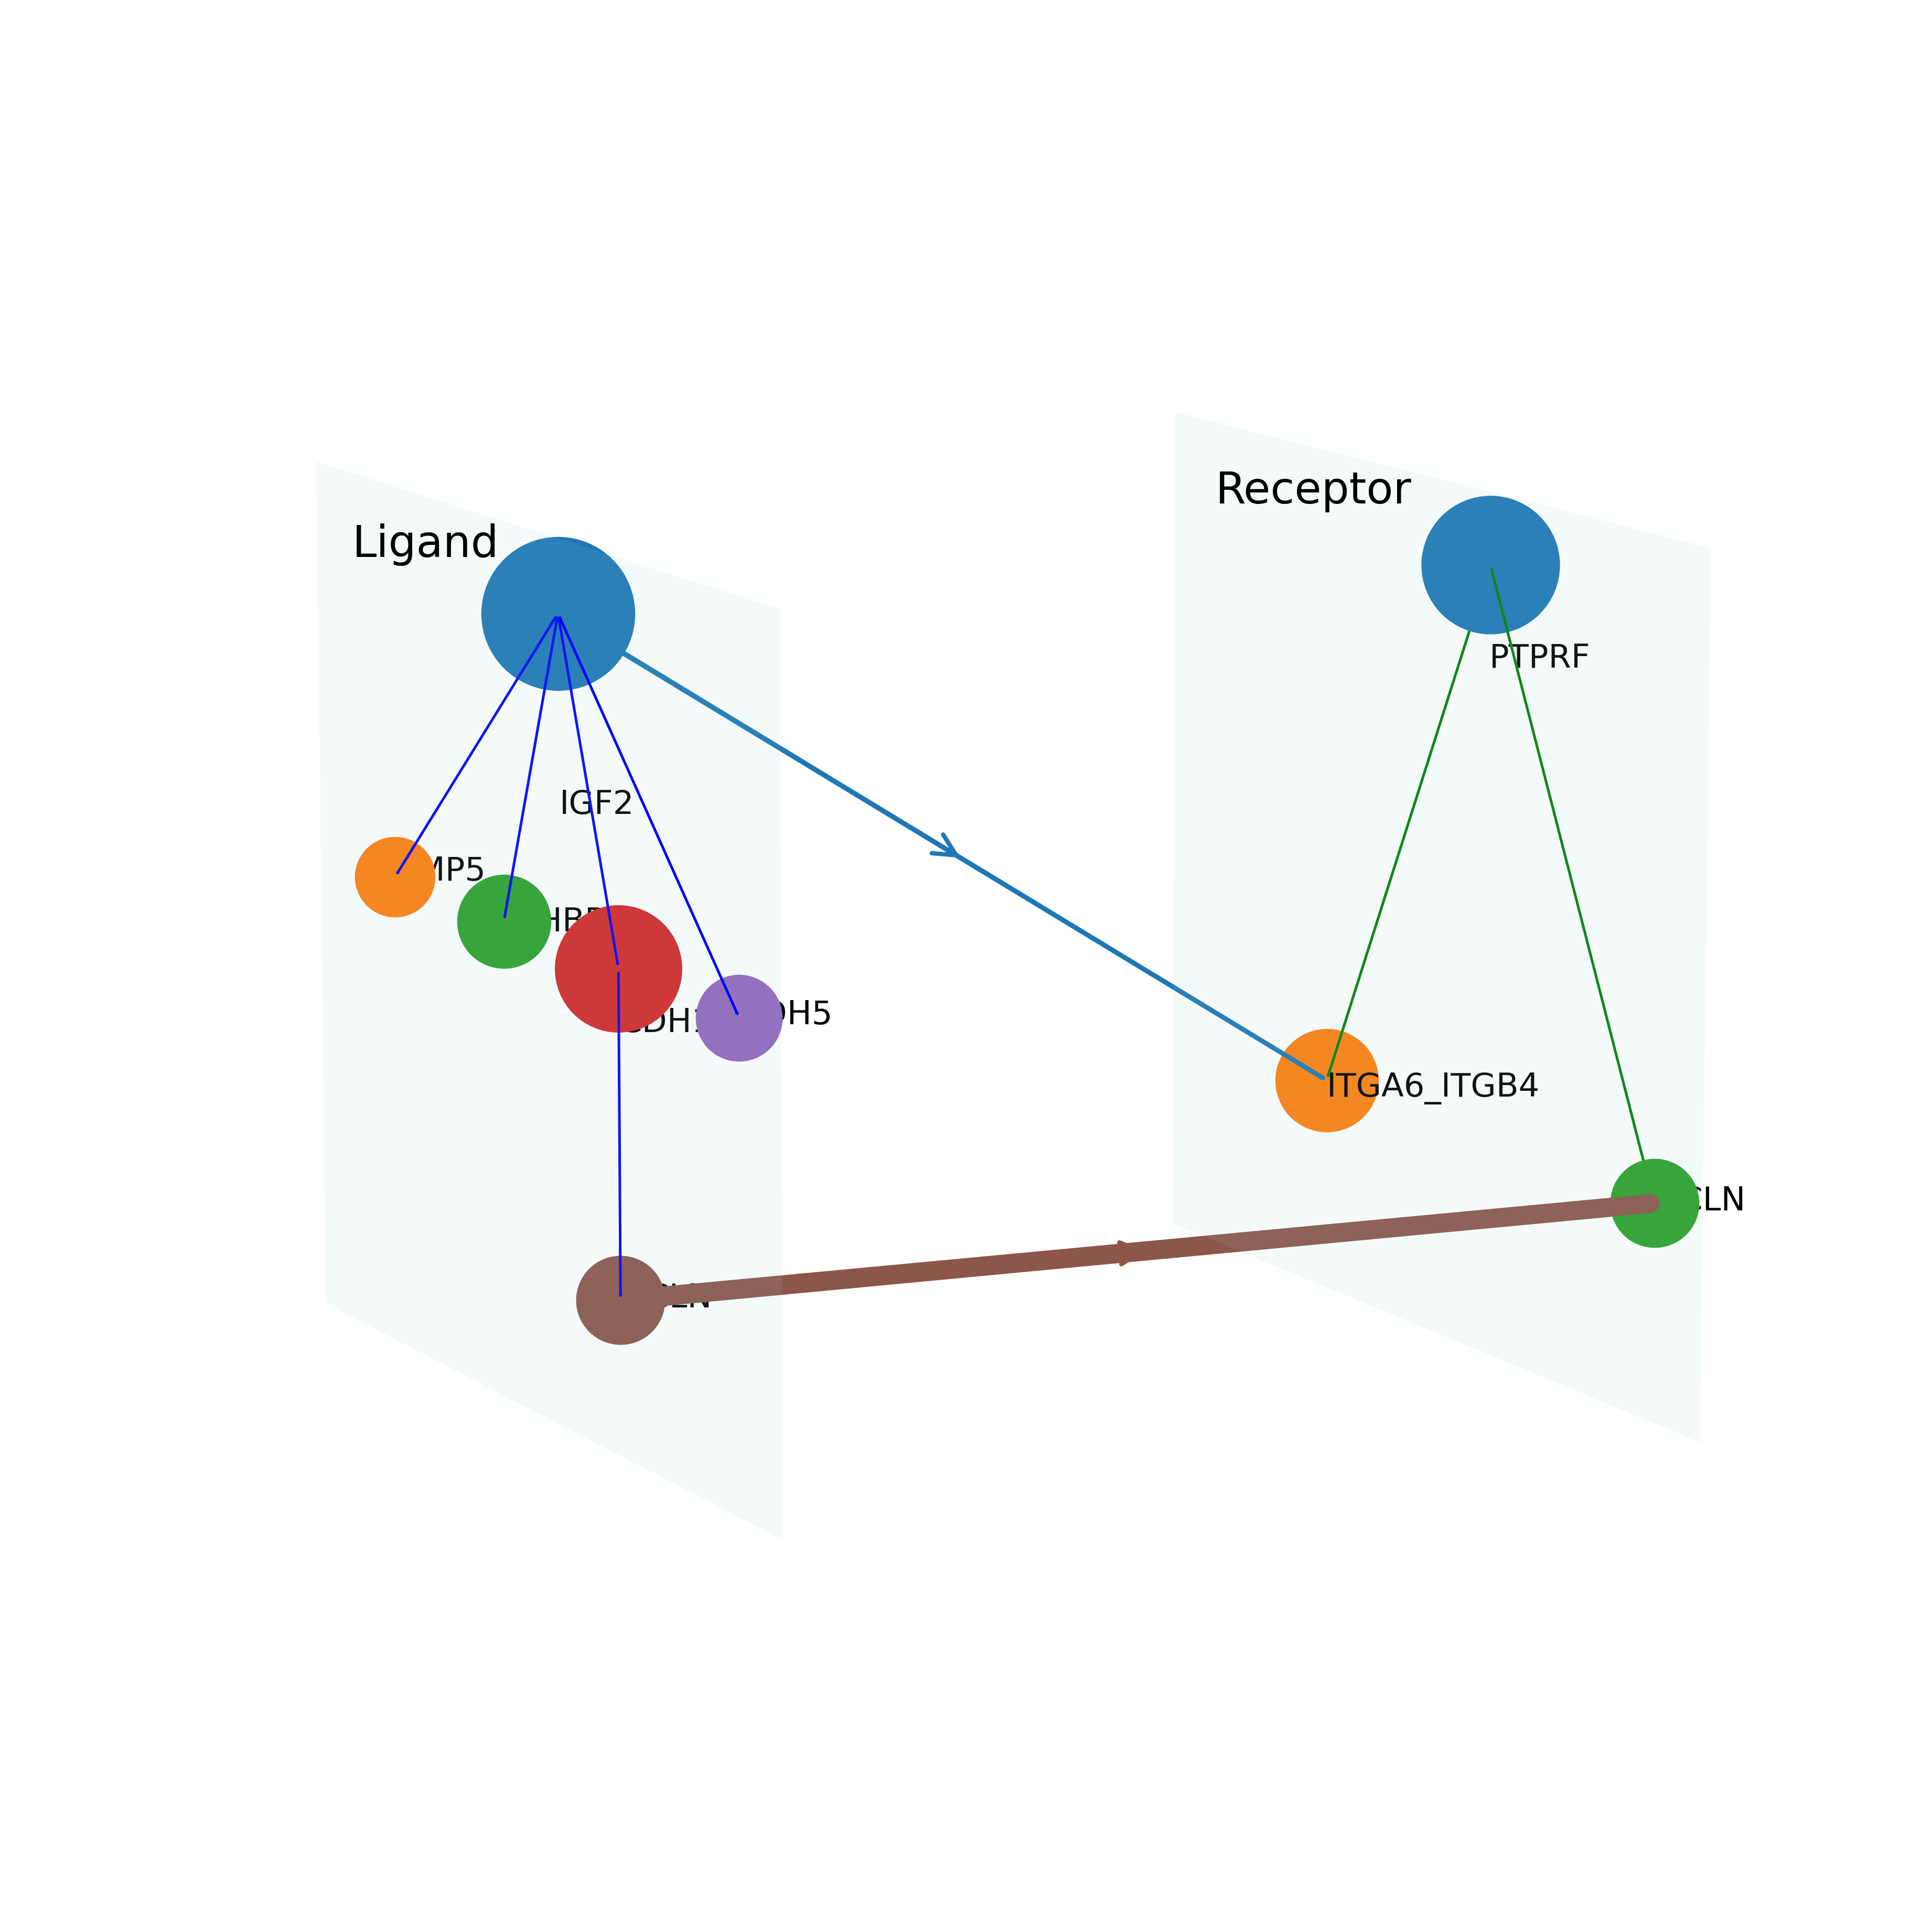

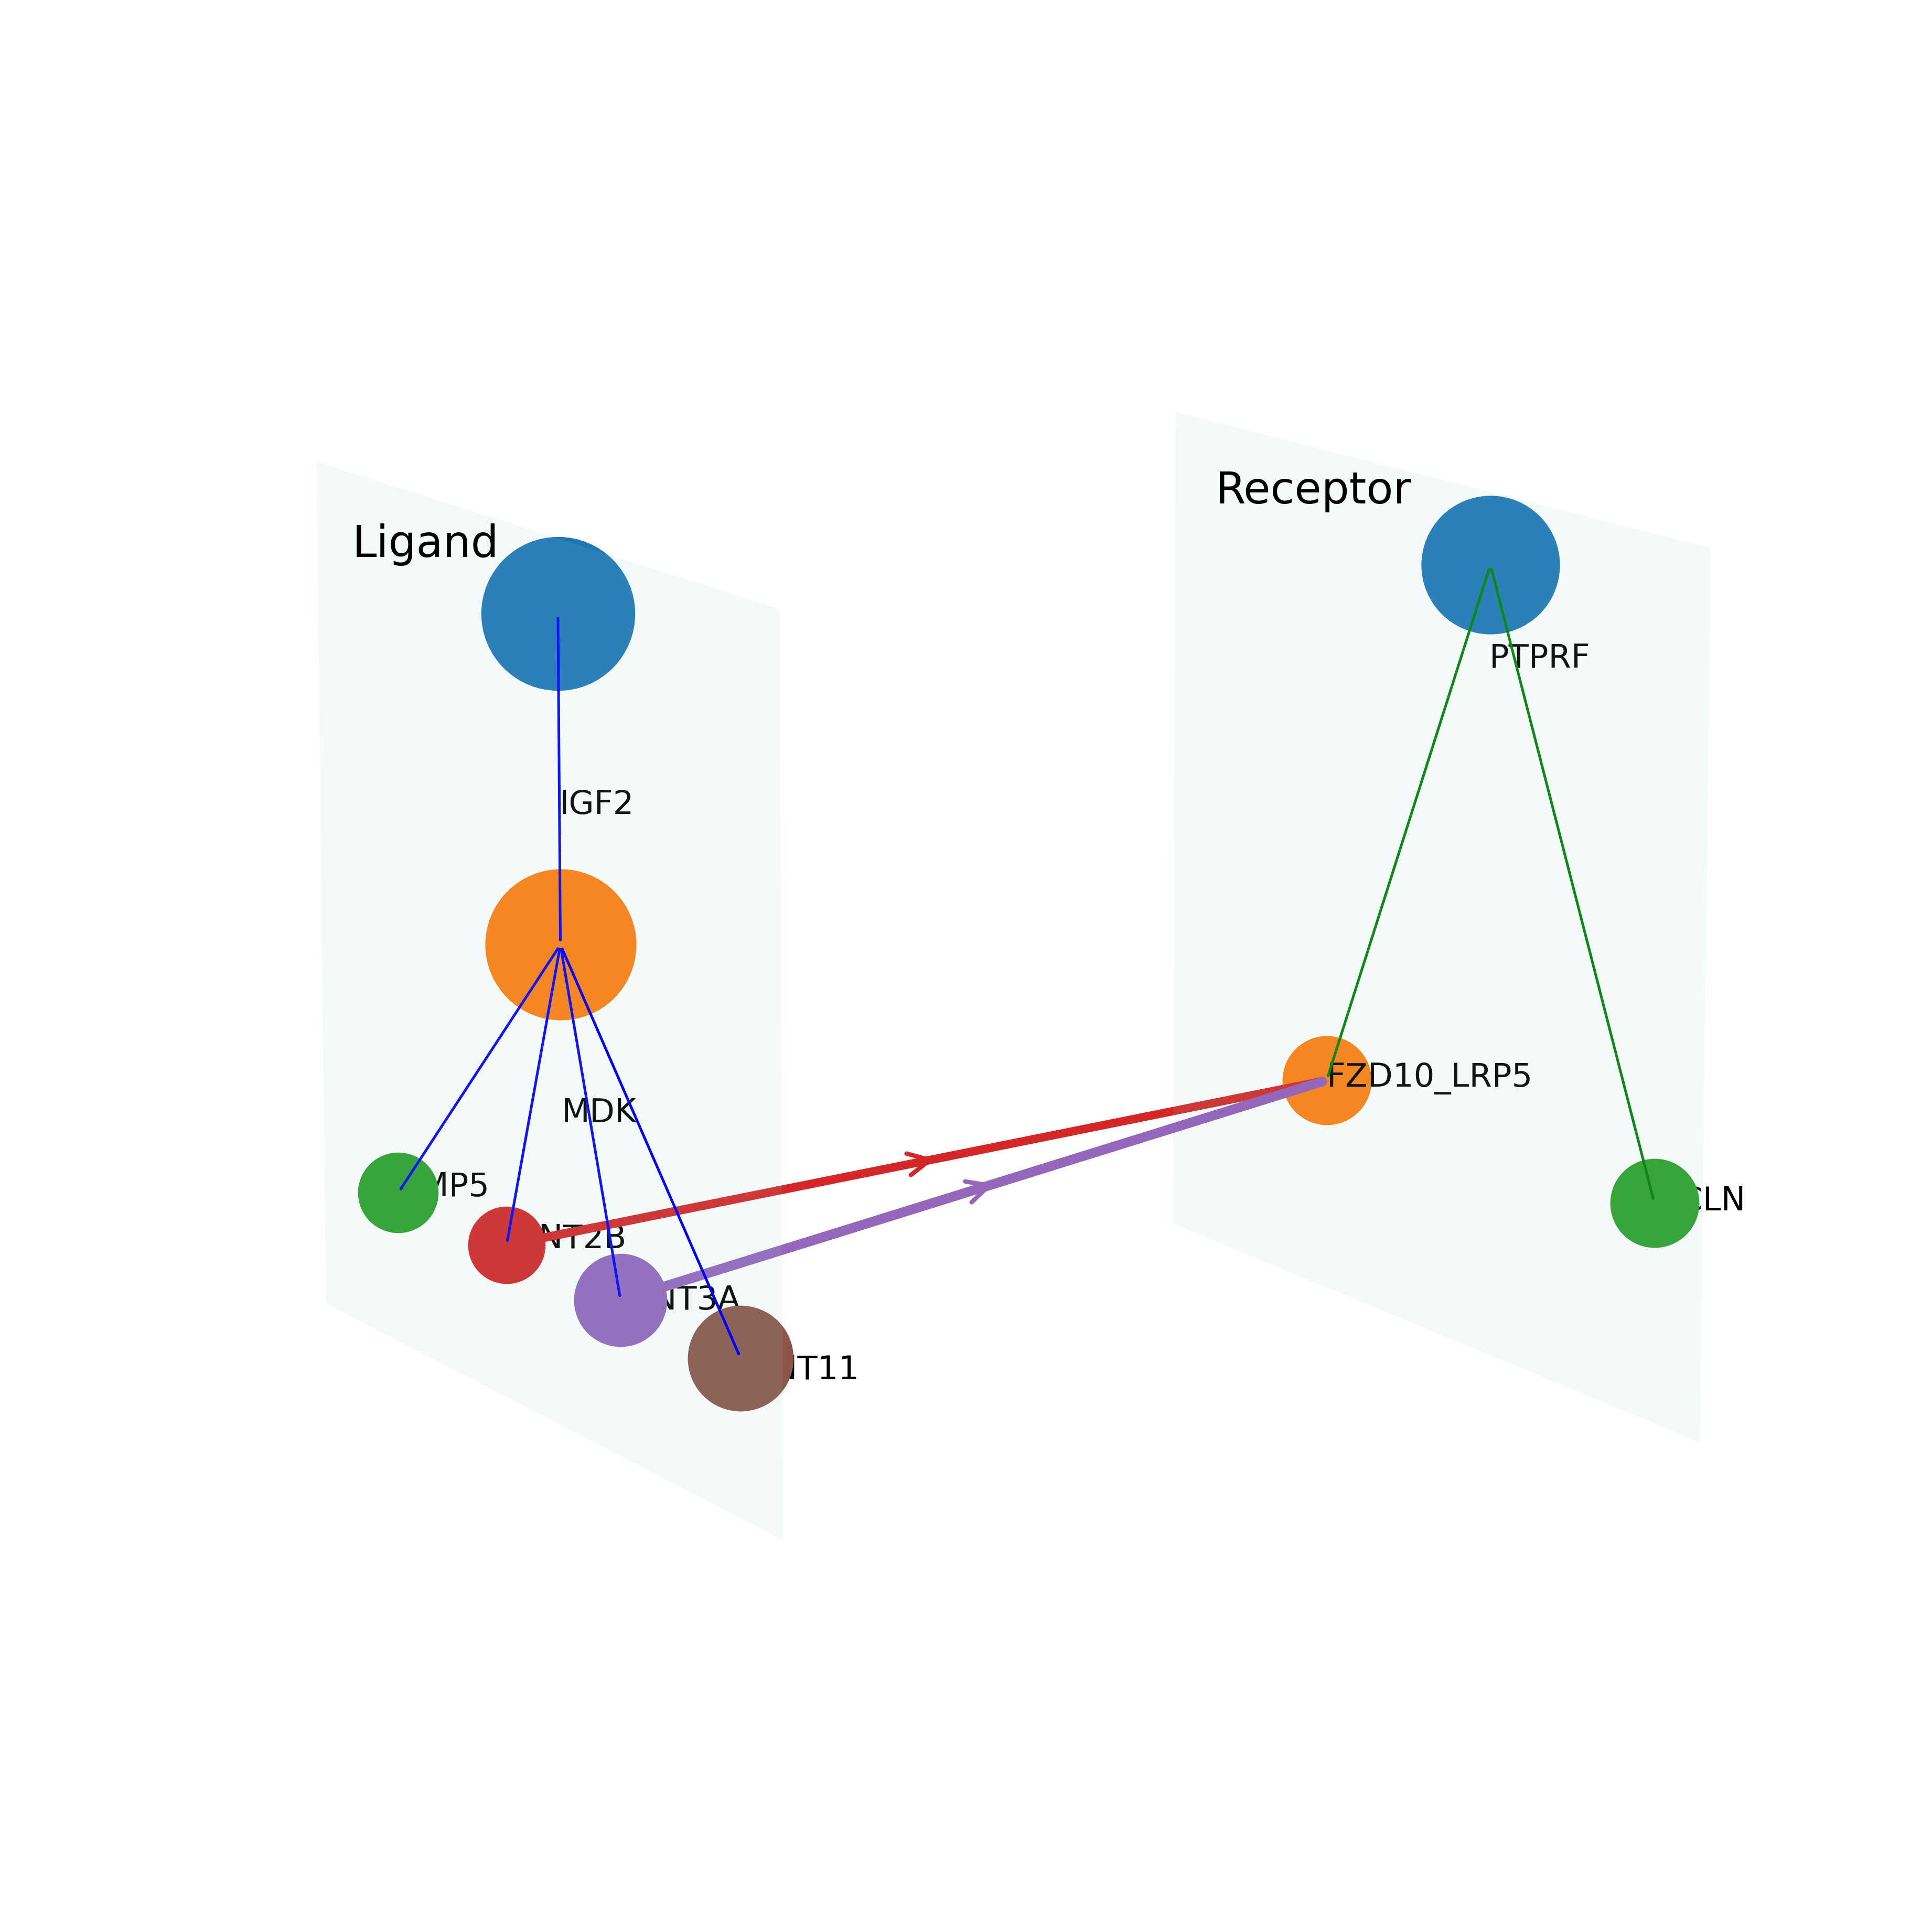

In [7]:
interacting_inds = ccT_obj.find_interacting_trees()
ccT_obj.Draw_CCC_between_MMT(lr_tree_inds = [[2,3],[3,3],[4,4],[6,3]])

### Plot frequency of ligand/receptor occurrence in ligands/receptors trees

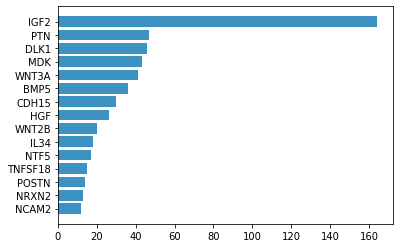

In [8]:
ccT_obj.plot_lr_frequency(type='l')

## CrossChatT on spatial dataset


### Load data and preprocess

In [10]:
adata = sc.read_h5ad('../src/crosschat/data/mouse_wounded_skin_PO7_visium.h5ad')
ccT_obj = cc.CrossChatT(adata,species="mouse")
ccT_obj.prepare_adata(normalize=True, scale=False, input='allgenes')

### Plot annotations in space

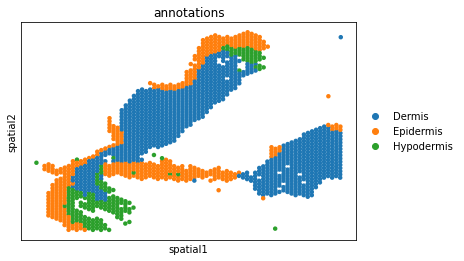

In [11]:
sc.pl.embedding(ccT_obj.adata, basis="spatial",color="annotations")


### Detect trees on spatial data.

Once we detected trees using spatial information, the rest of procedures are similar to those applied to scRNA-seq datasets.

In [12]:
ccT_obj.Detect_trees_S(type="l", tree_size=4, tree_scales=3)
ccT_obj.Detect_trees_S(type="r", tree_size=4, tree_scales=3)
ccT_obj.Detect_trees_S(type="lr_union", inclusive_threshold=0.97, disjoint_threshold=0.97, tree_size=4, tree_scales=3)

0


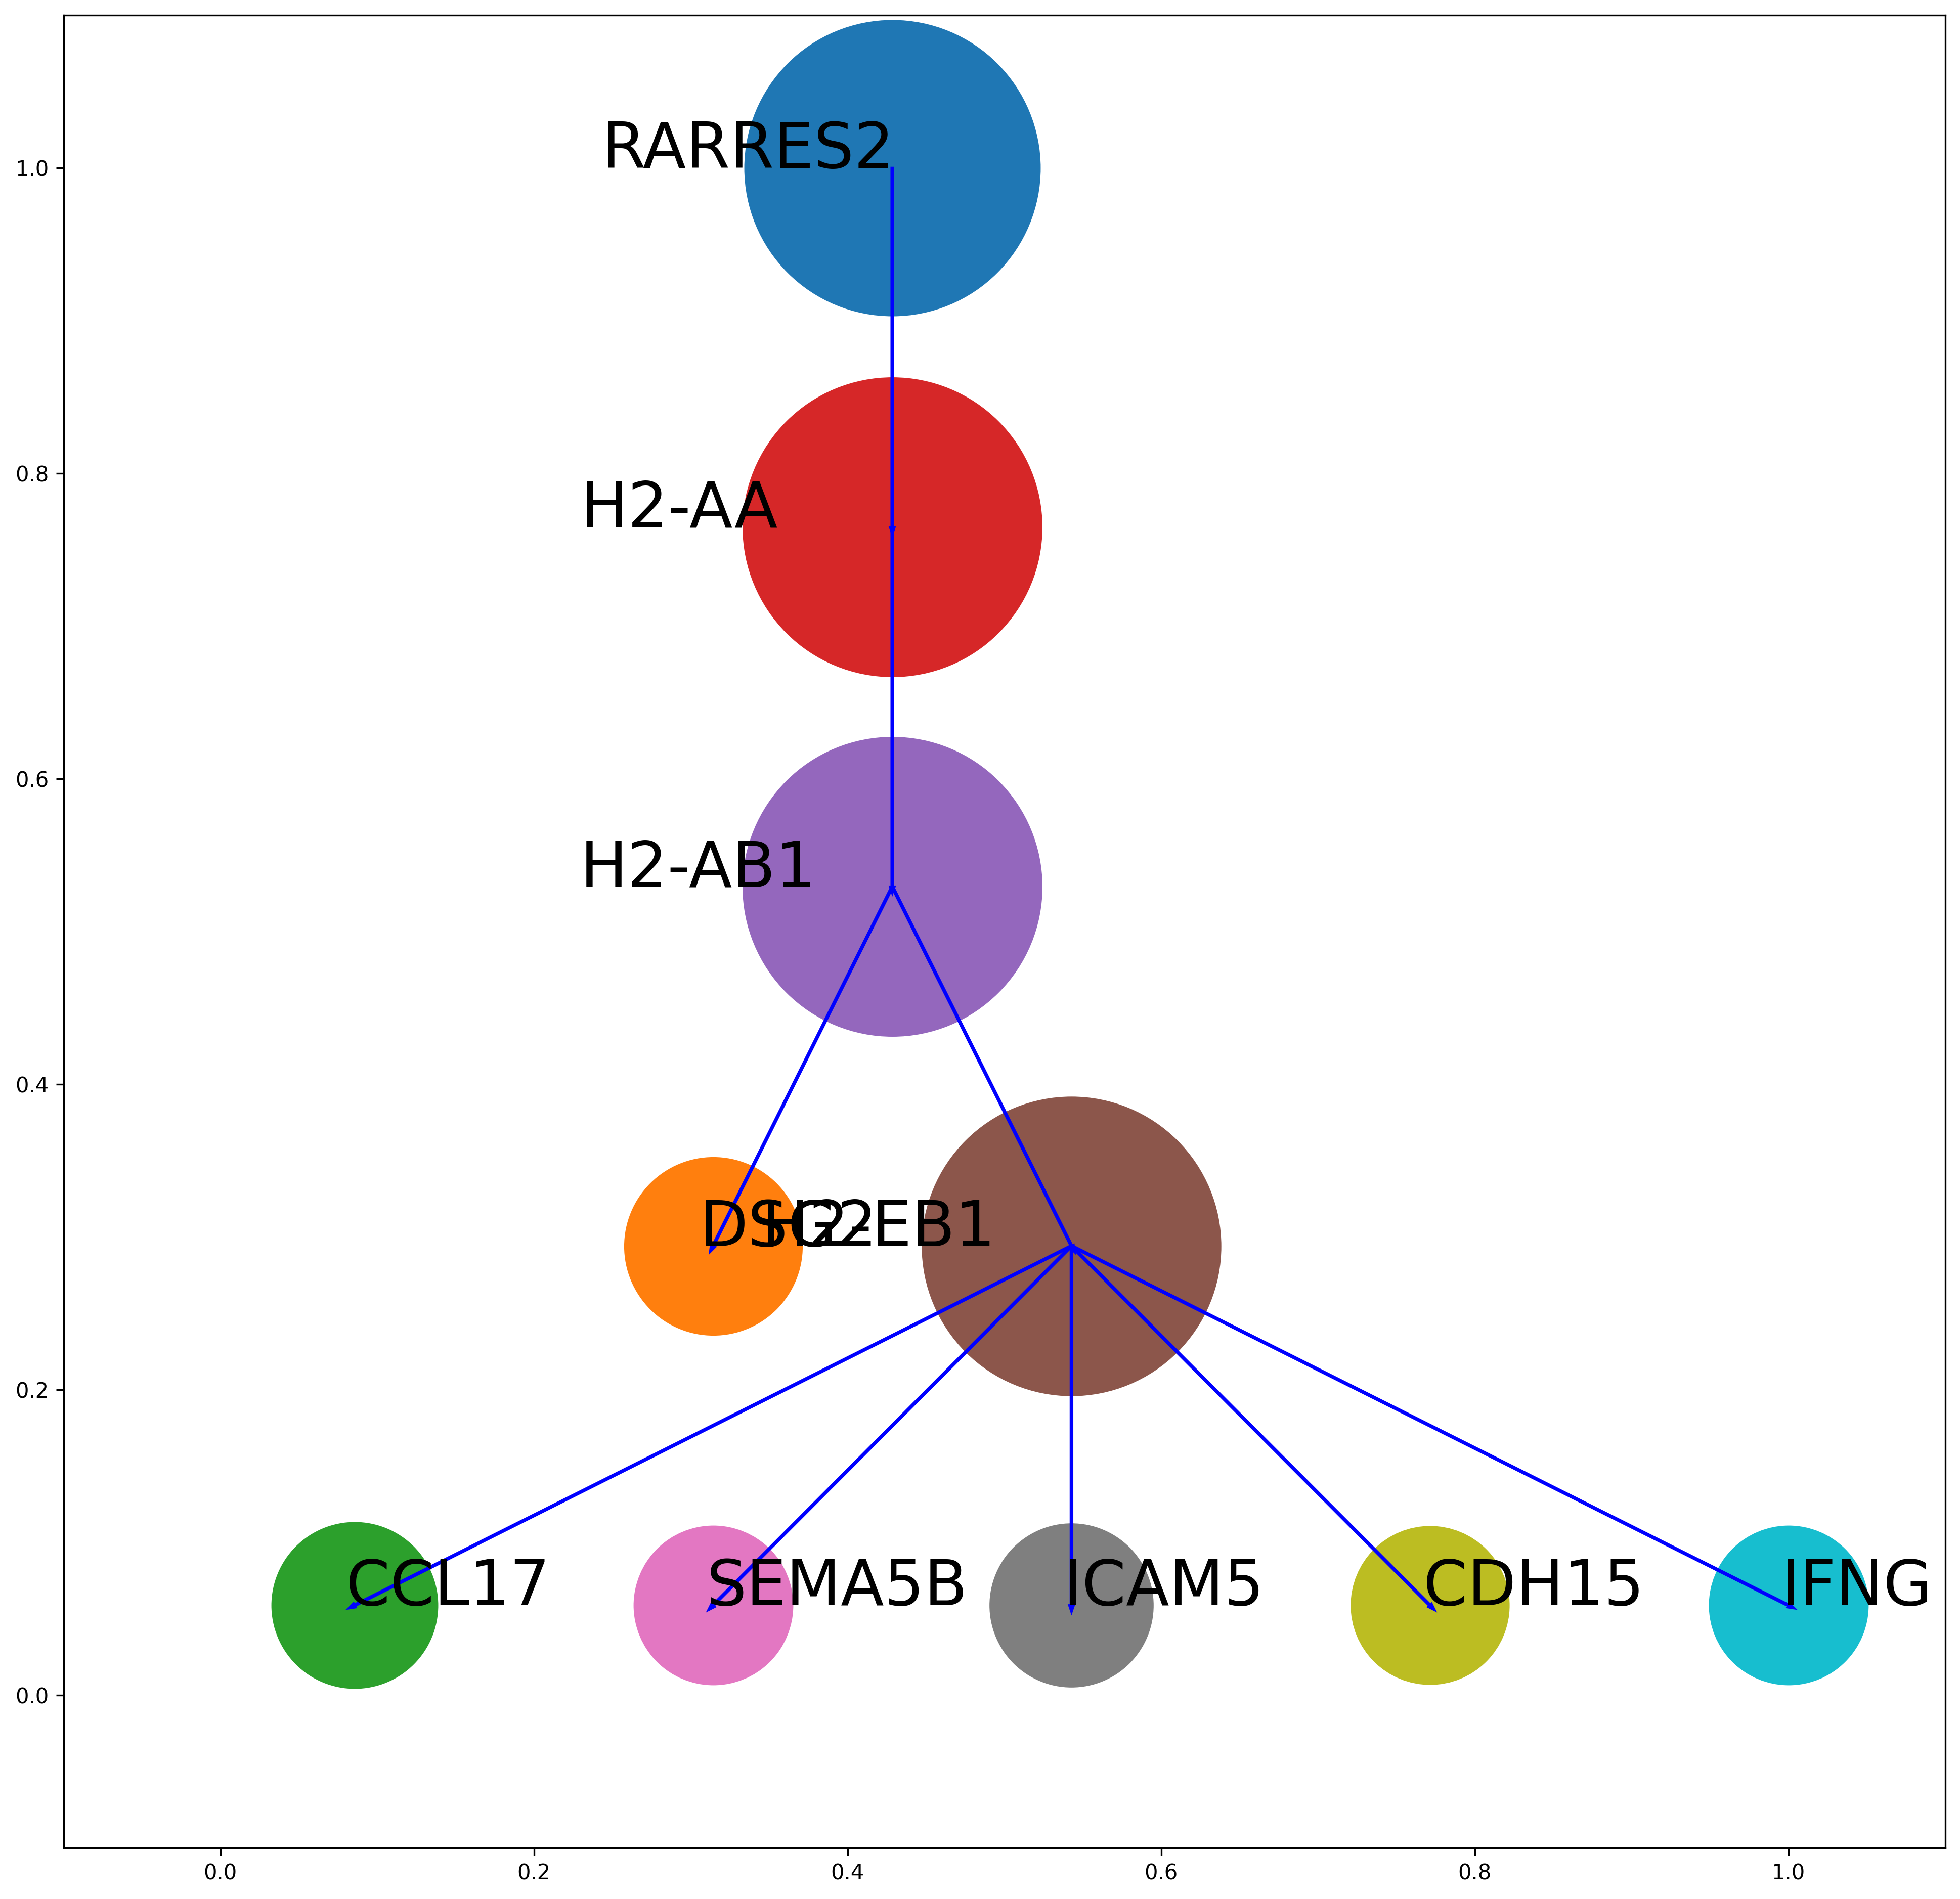

1


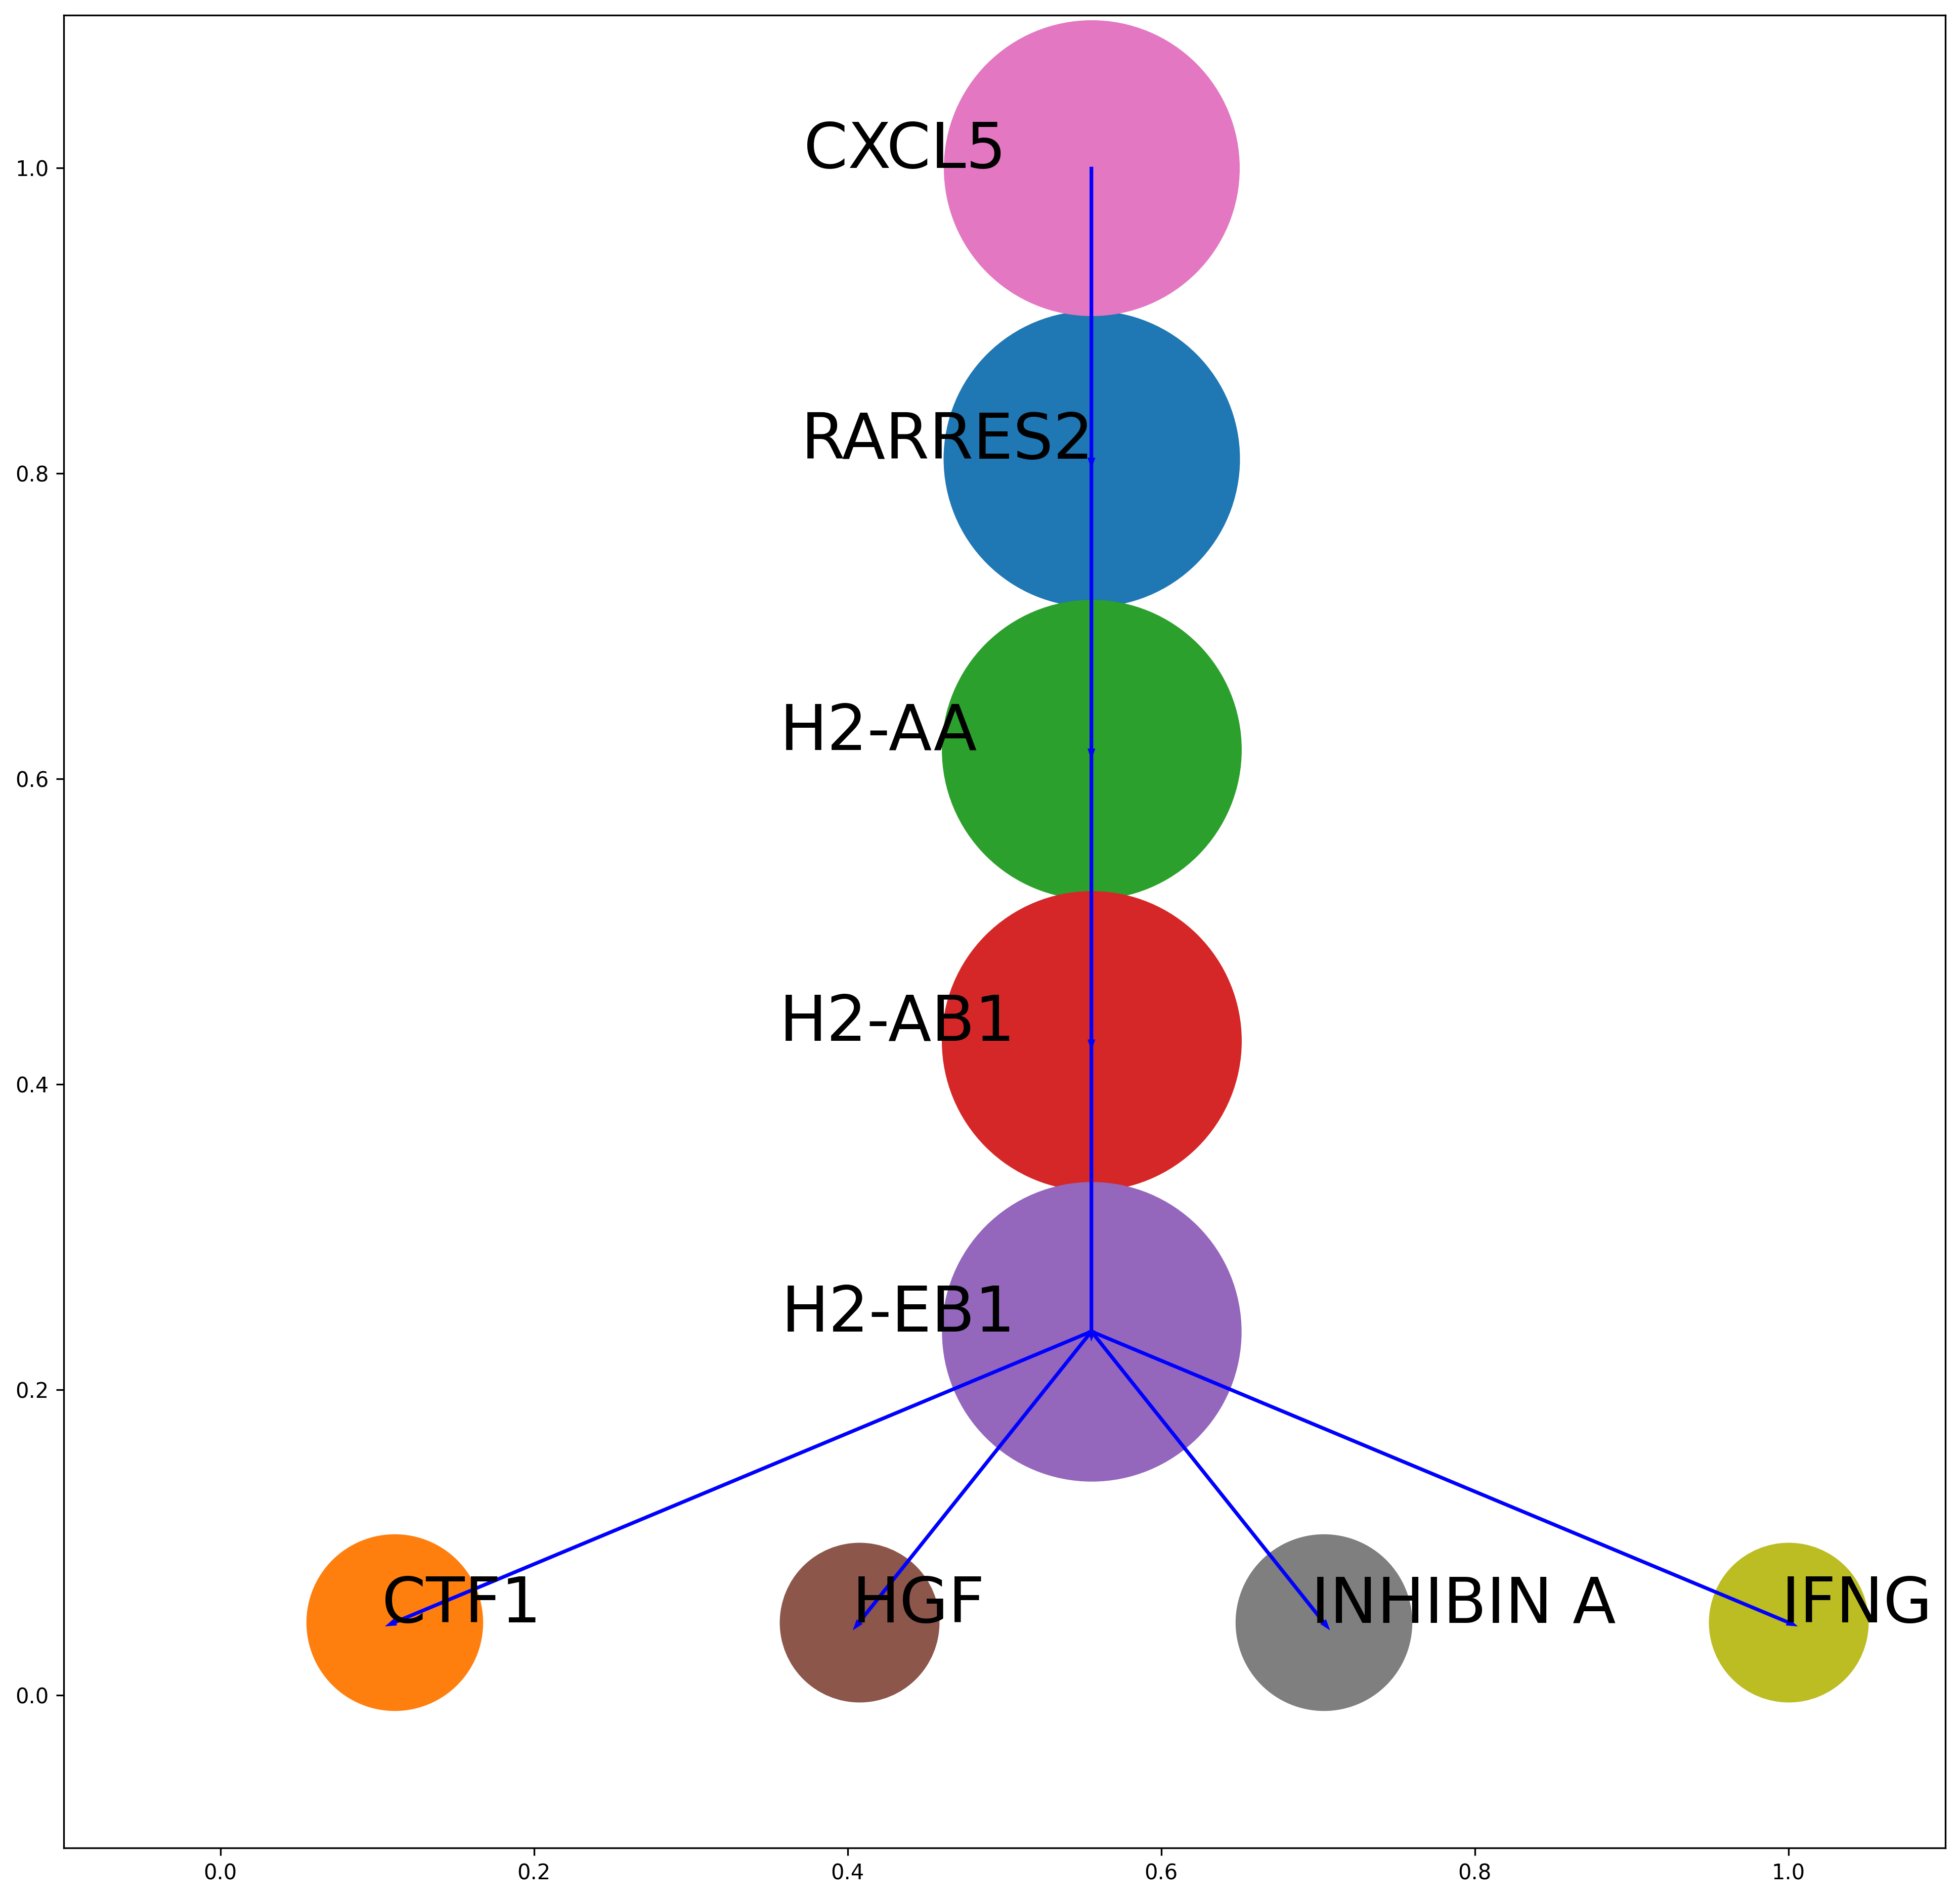

In [14]:
ccT_obj.Draw_MMT(type="l",tree_inds=[0,1])